<a href="https://colab.research.google.com/github/ericbanzuzi/Thesis-DL-LC/blob/main/notebooks/S3D_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from pathlib import Path

drive.mount('/content/drive', force_remount=True)
base = Path('/content/drive/MyDrive/thesis')  # working directory 

Mounted at /content/drive


Get the git repo to colab through a zip file to get faster performance

In [ ]:
zip_path = base/'Thesis-DL-LC-main.zip'
!cp '{zip_path}' .
!unzip -q Thesis-DL-LC-main.zip
!rm Thesis-DL-LC-main.zip

In [ ]:
%cd '/content/Thesis-DL-LC-main'

/content/Thesis-DL-LC-main


In [ ]:
# imports
!pip install av  # needed for video reading using pytorchvision
import torch
import numpy as np
import matplotlib.pyplot as plt
from models.models import S3D
from models.helper_functions import VideoFolderCustom, train, find_classes, eval_model, plot_training_path
from torchvision import transforms as t
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, RocCurveDisplay
import torch.nn as nn
from torch.utils.data import DataLoader

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 150
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 62.7 MB/s eta 0:00:00


In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# **BASELINE: Recognition**

These experiments are for the lane change recognition task. Here we look at how the model performs on the baseline dataset and how the size of the region of interest affects the performances. All the models are evaluated by their accuracy, precision, recall and ROC curves.

The training set up is the following:
- Train set size: 897
- Test set size: 299
- Adam optimizer with a learning rate 1e-3
- Epochs: 40
- Batch size: 16

### **ROI 2:**

In [ ]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 2'
train_data = VideoFolderCustom(targ_dir=train_dir, permute=True)

test_dir = './datasets/test/Recognition/ROI 2'
test_data = VideoFolderCustom(targ_dir=test_dir, permute=True)

print('Training data:', len(train_data))
print('Test data:', len(test_data))

Training data: 897
Test data: 299


In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'S3D_ROI2_recognition_baseline')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = S3D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 57/57 [00:59<00:00,  1.04s/it, acc=0.487, loss=1.04]


Epoch: 1 | train_loss: 1.0429 | train_acc: 0.4868 | test_loss: 1.0096 | test_acc: 0.4842


Epoch [2/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.519, loss=0.997]


Epoch: 2 | train_loss: 0.9970 | train_acc: 0.5186 | test_loss: 1.4898 | test_acc: 0.4868


Epoch [3/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.606, loss=0.897]


Epoch: 3 | train_loss: 0.8968 | train_acc: 0.6064 | test_loss: 1.8130 | test_acc: 0.3388


Epoch [4/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.654, loss=0.802]


Epoch: 4 | train_loss: 0.8015 | train_acc: 0.6535 | test_loss: 0.8784 | test_acc: 0.6056


Epoch [5/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.66, loss=0.794]


Epoch: 5 | train_loss: 0.7936 | train_acc: 0.6601 | test_loss: 0.7695 | test_acc: 0.6684


Epoch [6/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.695, loss=0.723]


Epoch: 6 | train_loss: 0.7232 | train_acc: 0.6952 | test_loss: 1.0515 | test_acc: 0.5990


Epoch [7/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.727, loss=0.698]


Epoch: 7 | train_loss: 0.6983 | train_acc: 0.7270 | test_loss: 0.7578 | test_acc: 0.6702


Epoch [8/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.714, loss=0.649]


Epoch: 8 | train_loss: 0.6487 | train_acc: 0.7138 | test_loss: 0.8920 | test_acc: 0.6636


Epoch [9/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.755, loss=0.604]


Epoch: 9 | train_loss: 0.6041 | train_acc: 0.7555 | test_loss: 0.5807 | test_acc: 0.7503


Epoch [10/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.774, loss=0.57]


Epoch: 10 | train_loss: 0.5704 | train_acc: 0.7741 | test_loss: 1.0335 | test_acc: 0.5942


Epoch [11/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.772, loss=0.557]


Epoch: 11 | train_loss: 0.5572 | train_acc: 0.7719 | test_loss: 0.7115 | test_acc: 0.7078


Epoch [12/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.785, loss=0.527]


Epoch: 12 | train_loss: 0.5271 | train_acc: 0.7851 | test_loss: 0.6680 | test_acc: 0.7072


Epoch [13/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.827, loss=0.451]


Epoch: 13 | train_loss: 0.4511 | train_acc: 0.8268 | test_loss: 0.6714 | test_acc: 0.7964


Epoch [14/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.812, loss=0.477]


Epoch: 14 | train_loss: 0.4773 | train_acc: 0.8125 | test_loss: 0.4686 | test_acc: 0.8278


Epoch [15/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.816, loss=0.45]


Epoch: 15 | train_loss: 0.4501 | train_acc: 0.8158 | test_loss: 0.7221 | test_acc: 0.6929


Epoch [16/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.87, loss=0.356]


Epoch: 16 | train_loss: 0.3560 | train_acc: 0.8695 | test_loss: 0.5693 | test_acc: 0.7862


Epoch [17/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.891, loss=0.324]


Epoch: 17 | train_loss: 0.3241 | train_acc: 0.8914 | test_loss: 0.5500 | test_acc: 0.7964


Epoch [18/40]: 100%|██████████| 57/57 [00:52<00:00,  1.09it/s, acc=0.843, loss=0.387]


Epoch: 18 | train_loss: 0.3869 | train_acc: 0.8432 | test_loss: 0.6292 | test_acc: 0.7602


Epoch [19/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.862, loss=0.395]


Epoch: 19 | train_loss: 0.3949 | train_acc: 0.8618 | test_loss: 0.4953 | test_acc: 0.8095


Epoch [20/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.898, loss=0.296]


Epoch: 20 | train_loss: 0.2965 | train_acc: 0.8980 | test_loss: 0.7102 | test_acc: 0.7192


Epoch [21/40]: 100%|██████████| 57/57 [00:50<00:00,  1.12it/s, acc=0.886, loss=0.332]


Epoch: 21 | train_loss: 0.3318 | train_acc: 0.8860 | test_loss: 0.5709 | test_acc: 0.7913


Epoch [22/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.896, loss=0.267]


Epoch: 22 | train_loss: 0.2672 | train_acc: 0.8958 | test_loss: 0.5503 | test_acc: 0.7967


Epoch [23/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.897, loss=0.227]


Epoch: 23 | train_loss: 0.2266 | train_acc: 0.8969 | test_loss: 0.6590 | test_acc: 0.7901


Epoch [24/40]: 100%|██████████| 57/57 [00:51<00:00,  1.12it/s, acc=0.919, loss=0.225]


Epoch: 24 | train_loss: 0.2249 | train_acc: 0.9189 | test_loss: 0.7056 | test_acc: 0.8011


Epoch [25/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.911, loss=0.213]


Epoch: 25 | train_loss: 0.2131 | train_acc: 0.9112 | test_loss: 1.2353 | test_acc: 0.6504


Epoch [26/40]: 100%|██████████| 57/57 [00:50<00:00,  1.12it/s, acc=0.929, loss=0.217]


Epoch: 26 | train_loss: 0.2170 | train_acc: 0.9287 | test_loss: 0.4447 | test_acc: 0.8457


Epoch [27/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.944, loss=0.127]


Epoch: 27 | train_loss: 0.1267 | train_acc: 0.9441 | test_loss: 0.3941 | test_acc: 0.8834


Epoch [28/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.946, loss=0.139]


Epoch: 28 | train_loss: 0.1393 | train_acc: 0.9463 | test_loss: 0.9791 | test_acc: 0.8161


Epoch [29/40]: 100%|██████████| 57/57 [00:51<00:00,  1.12it/s, acc=0.909, loss=0.249]


Epoch: 29 | train_loss: 0.2488 | train_acc: 0.9090 | test_loss: 0.5135 | test_acc: 0.8606


Epoch [30/40]: 100%|██████████| 57/57 [00:50<00:00,  1.12it/s, acc=0.908, loss=0.276]


Epoch: 30 | train_loss: 0.2759 | train_acc: 0.9079 | test_loss: 0.6333 | test_acc: 0.8047


Epoch [31/40]: 100%|██████████| 57/57 [00:50<00:00,  1.12it/s, acc=0.917, loss=0.201]


Epoch: 31 | train_loss: 0.2006 | train_acc: 0.9167 | test_loss: 0.4747 | test_acc: 0.8654


Epoch [32/40]: 100%|██████████| 57/57 [00:50<00:00,  1.12it/s, acc=0.924, loss=0.172]


Epoch: 32 | train_loss: 0.1720 | train_acc: 0.9243 | test_loss: 0.6024 | test_acc: 0.8230


Epoch [33/40]: 100%|██████████| 57/57 [00:50<00:00,  1.12it/s, acc=0.954, loss=0.115]


Epoch: 33 | train_loss: 0.1151 | train_acc: 0.9539 | test_loss: 0.5111 | test_acc: 0.8490


Epoch [34/40]: 100%|██████████| 57/57 [00:51<00:00,  1.12it/s, acc=0.974, loss=0.0921]


Epoch: 34 | train_loss: 0.0921 | train_acc: 0.9737 | test_loss: 0.5734 | test_acc: 0.8574


Epoch [35/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.961, loss=0.113]


Epoch: 35 | train_loss: 0.1129 | train_acc: 0.9605 | test_loss: 1.1909 | test_acc: 0.7368


Epoch [36/40]: 100%|██████████| 57/57 [00:50<00:00,  1.12it/s, acc=0.928, loss=0.18]


Epoch: 36 | train_loss: 0.1798 | train_acc: 0.9276 | test_loss: 0.5822 | test_acc: 0.8487


Epoch [37/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.944, loss=0.193]


Epoch: 37 | train_loss: 0.1934 | train_acc: 0.9441 | test_loss: 1.4139 | test_acc: 0.7222


Epoch [38/40]: 100%|██████████| 57/57 [00:51<00:00,  1.12it/s, acc=0.966, loss=0.122]


Epoch: 38 | train_loss: 0.1224 | train_acc: 0.9660 | test_loss: 0.7178 | test_acc: 0.7802


Epoch [39/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.956, loss=0.115]


Epoch: 39 | train_loss: 0.1150 | train_acc: 0.9561 | test_loss: 0.5448 | test_acc: 0.8457


Epoch [40/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.945, loss=0.108]


Epoch: 40 | train_loss: 0.1080 | train_acc: 0.9452 | test_loss: 0.5987 | test_acc: 0.8589
Total training time: 2623.702 seconds


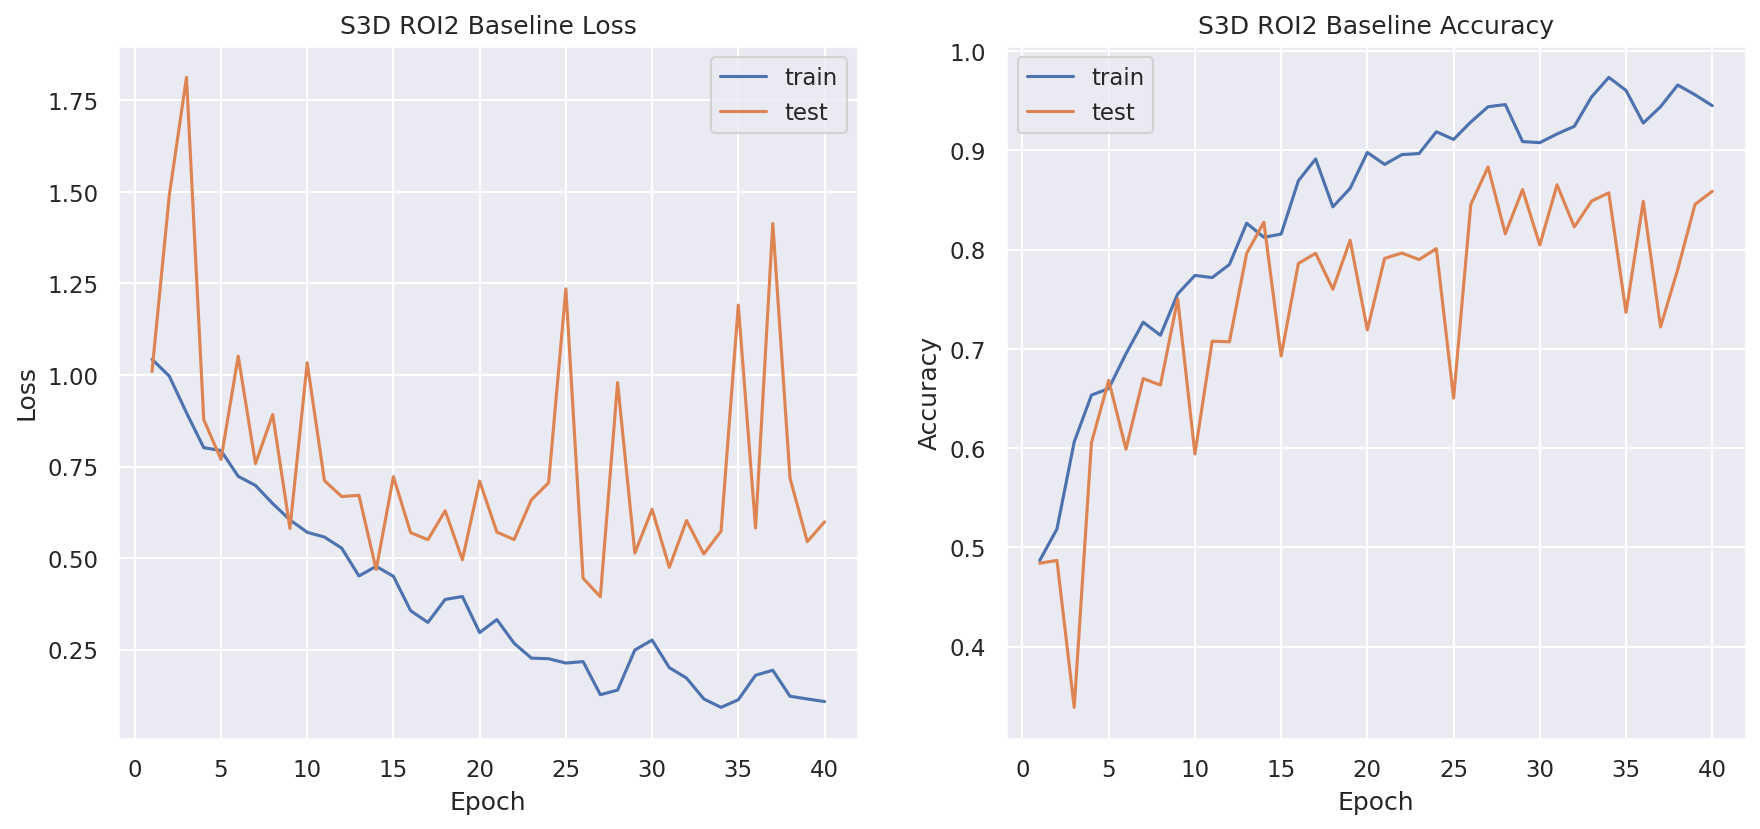

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'S3D ROI2 Baseline')

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = S3D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.882943143812709
Precision: 0.8833333333333333
Recall: 0.8829721362229103


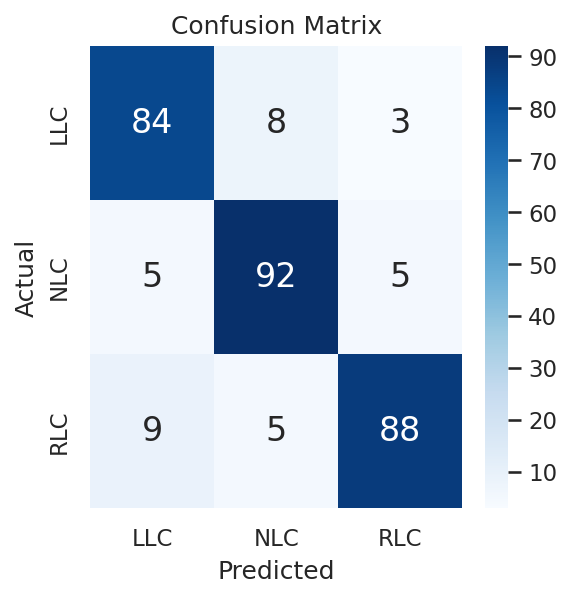

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

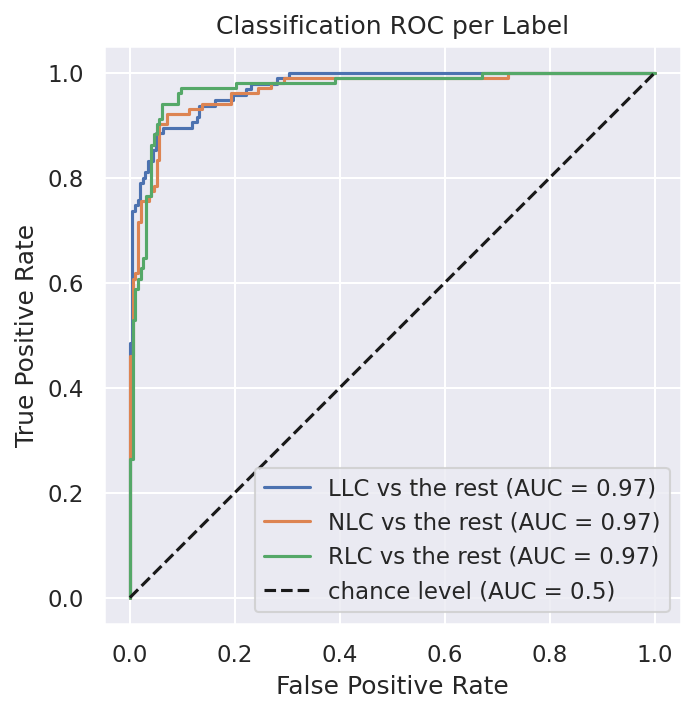

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

### **ROI 3:**

In [ ]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 3'
train_data = VideoFolderCustom(targ_dir=train_dir, permute=True)

test_dir = './datasets/test/Recognition/ROI 3'
test_data = VideoFolderCustom(targ_dir=test_dir, permute=True)

In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'S3D_ROI3_recognition_baseline')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = S3D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.456, loss=1.08]


Epoch: 1 | train_loss: 1.0840 | train_acc: 0.4561 | test_loss: 1.0894 | test_acc: 0.4046


Epoch [2/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.475, loss=1.02]


Epoch: 2 | train_loss: 1.0235 | train_acc: 0.4748 | test_loss: 1.2984 | test_acc: 0.3717


Epoch [3/40]: 100%|██████████| 57/57 [00:52<00:00,  1.09it/s, acc=0.526, loss=0.973]


Epoch: 3 | train_loss: 0.9730 | train_acc: 0.5263 | test_loss: 1.4428 | test_acc: 0.3469


Epoch [4/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.607, loss=0.843]


Epoch: 4 | train_loss: 0.8429 | train_acc: 0.6075 | test_loss: 1.5354 | test_acc: 0.3600


Epoch [5/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.648, loss=0.804]


Epoch: 5 | train_loss: 0.8037 | train_acc: 0.6480 | test_loss: 1.3542 | test_acc: 0.3684


Epoch [6/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.663, loss=0.768]


Epoch: 6 | train_loss: 0.7683 | train_acc: 0.6634 | test_loss: 0.7843 | test_acc: 0.6797


Epoch [7/40]: 100%|██████████| 57/57 [00:52<00:00,  1.10it/s, acc=0.68, loss=0.745]


Epoch: 7 | train_loss: 0.7451 | train_acc: 0.6798 | test_loss: 0.8128 | test_acc: 0.6163


Epoch [8/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.716, loss=0.679]


Epoch: 8 | train_loss: 0.6793 | train_acc: 0.7160 | test_loss: 0.8282 | test_acc: 0.6714


Epoch [9/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.741, loss=0.637]


Epoch: 9 | train_loss: 0.6366 | train_acc: 0.7412 | test_loss: 0.9787 | test_acc: 0.5867


Epoch [10/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.777, loss=0.589]


Epoch: 10 | train_loss: 0.5893 | train_acc: 0.7774 | test_loss: 0.8280 | test_acc: 0.6830


Epoch [11/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.768, loss=0.574]


Epoch: 11 | train_loss: 0.5740 | train_acc: 0.7675 | test_loss: 1.2887 | test_acc: 0.6749


Epoch [12/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.761, loss=0.572]


Epoch: 12 | train_loss: 0.5718 | train_acc: 0.7610 | test_loss: 0.6008 | test_acc: 0.7542


Epoch [13/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.787, loss=0.533]


Epoch: 13 | train_loss: 0.5332 | train_acc: 0.7873 | test_loss: 0.5734 | test_acc: 0.7919


Epoch [14/40]: 100%|██████████| 57/57 [00:52<00:00,  1.09it/s, acc=0.799, loss=0.497]


Epoch: 14 | train_loss: 0.4974 | train_acc: 0.7993 | test_loss: 0.7521 | test_acc: 0.6983


Epoch [15/40]: 100%|██████████| 57/57 [00:52<00:00,  1.09it/s, acc=0.795, loss=0.469]


Epoch: 15 | train_loss: 0.4694 | train_acc: 0.7950 | test_loss: 0.5557 | test_acc: 0.7969


Epoch [16/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.811, loss=0.464]


Epoch: 16 | train_loss: 0.4644 | train_acc: 0.8114 | test_loss: 0.6432 | test_acc: 0.7700


Epoch [17/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.853, loss=0.376]


Epoch: 17 | train_loss: 0.3763 | train_acc: 0.8531 | test_loss: 0.8749 | test_acc: 0.7141


Epoch [18/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.845, loss=0.369]


Epoch: 18 | train_loss: 0.3687 | train_acc: 0.8454 | test_loss: 0.6092 | test_acc: 0.7784


Epoch [19/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.852, loss=0.374]


Epoch: 19 | train_loss: 0.3744 | train_acc: 0.8520 | test_loss: 0.5862 | test_acc: 0.8002


Epoch [20/40]: 100%|██████████| 57/57 [00:52<00:00,  1.09it/s, acc=0.837, loss=0.405]


Epoch: 20 | train_loss: 0.4048 | train_acc: 0.8366 | test_loss: 1.0713 | test_acc: 0.6815


Epoch [21/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.861, loss=0.334]


Epoch: 21 | train_loss: 0.3336 | train_acc: 0.8607 | test_loss: 0.4834 | test_acc: 0.8508


Epoch [22/40]: 100%|██████████| 57/57 [00:52<00:00,  1.09it/s, acc=0.897, loss=0.284]


Epoch: 22 | train_loss: 0.2840 | train_acc: 0.8969 | test_loss: 0.6655 | test_acc: 0.7832


Epoch [23/40]: 100%|██████████| 57/57 [00:52<00:00,  1.09it/s, acc=0.856, loss=0.345]


Epoch: 23 | train_loss: 0.3445 | train_acc: 0.8564 | test_loss: 1.0046 | test_acc: 0.6708


Epoch [24/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.907, loss=0.236]


Epoch: 24 | train_loss: 0.2358 | train_acc: 0.9068 | test_loss: 0.5975 | test_acc: 0.8328


Epoch [25/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.891, loss=0.276]


Epoch: 25 | train_loss: 0.2765 | train_acc: 0.8914 | test_loss: 0.6801 | test_acc: 0.7772


Epoch [26/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.907, loss=0.261]


Epoch: 26 | train_loss: 0.2611 | train_acc: 0.9068 | test_loss: 0.6227 | test_acc: 0.8212


Epoch [27/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.901, loss=0.242]


Epoch: 27 | train_loss: 0.2416 | train_acc: 0.9013 | test_loss: 0.6607 | test_acc: 0.8176


Epoch [28/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.898, loss=0.236]


Epoch: 28 | train_loss: 0.2356 | train_acc: 0.8980 | test_loss: 0.7196 | test_acc: 0.7560


Epoch [29/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.908, loss=0.259]


Epoch: 29 | train_loss: 0.2591 | train_acc: 0.9079 | test_loss: 0.8293 | test_acc: 0.7949


Epoch [30/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.933, loss=0.188]


Epoch: 30 | train_loss: 0.1877 | train_acc: 0.9331 | test_loss: 0.5660 | test_acc: 0.8242


Epoch [31/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.942, loss=0.121]


Epoch: 31 | train_loss: 0.1213 | train_acc: 0.9419 | test_loss: 0.6947 | test_acc: 0.8014


Epoch [32/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.886, loss=0.268]


Epoch: 32 | train_loss: 0.2684 | train_acc: 0.8860 | test_loss: 1.2993 | test_acc: 0.6884


Epoch [33/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.895, loss=0.252]


Epoch: 33 | train_loss: 0.2516 | train_acc: 0.8947 | test_loss: 0.5878 | test_acc: 0.8215


Epoch [34/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.932, loss=0.168]


Epoch: 34 | train_loss: 0.1678 | train_acc: 0.9320 | test_loss: 0.5642 | test_acc: 0.8442


Epoch [35/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.953, loss=0.0887]


Epoch: 35 | train_loss: 0.0887 | train_acc: 0.9529 | test_loss: 0.5571 | test_acc: 0.8541


Epoch [36/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.967, loss=0.11]


Epoch: 36 | train_loss: 0.1104 | train_acc: 0.9671 | test_loss: 1.2310 | test_acc: 0.7117


Epoch [37/40]: 100%|██████████| 57/57 [00:52<00:00,  1.09it/s, acc=0.952, loss=0.102]


Epoch: 37 | train_loss: 0.1024 | train_acc: 0.9518 | test_loss: 0.7023 | test_acc: 0.8212


Epoch [38/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.947, loss=0.136]


Epoch: 38 | train_loss: 0.1361 | train_acc: 0.9474 | test_loss: 0.8562 | test_acc: 0.8131


Epoch [39/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.929, loss=0.181]


Epoch: 39 | train_loss: 0.1811 | train_acc: 0.9287 | test_loss: 0.8881 | test_acc: 0.8014


Epoch [40/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.953, loss=0.132]


Epoch: 40 | train_loss: 0.1319 | train_acc: 0.9529 | test_loss: 0.6249 | test_acc: 0.8295
Total training time: 2644.523 seconds


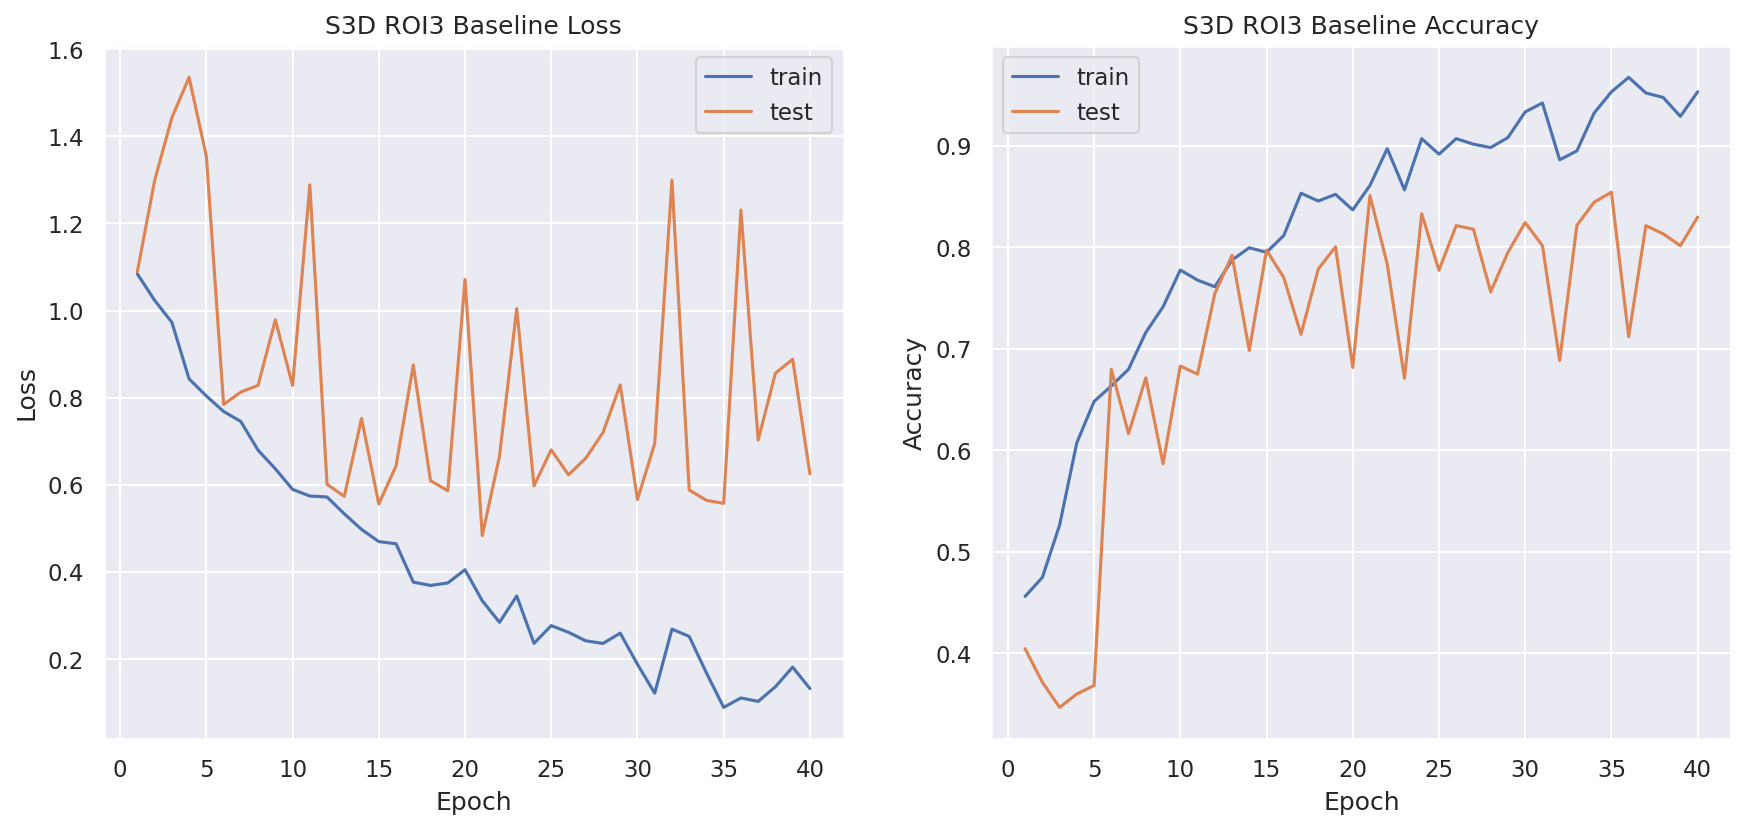

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'S3D ROI3 Baseline')

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = S3D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.8561872909698997
Precision: 0.8614679071902073
Recall: 0.8558651530787754


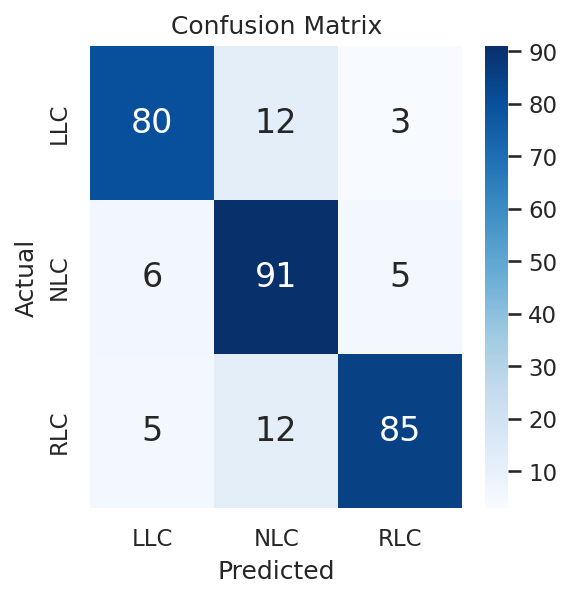

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

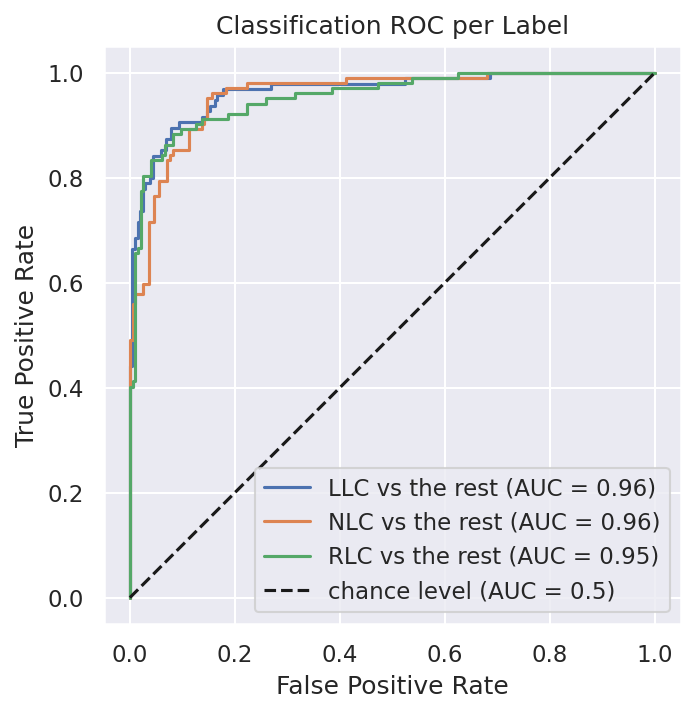

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

### **ROI 4:** 

In [ ]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 4'
train_data = VideoFolderCustom(targ_dir=train_dir, permute=True)

test_dir = './datasets/test/Recognition/ROI 4'
test_data = VideoFolderCustom(targ_dir=test_dir, permute=True)

In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'S3D_ROI4_recognition_baseline')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = S3D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.47, loss=1.09]


Epoch: 1 | train_loss: 1.0852 | train_acc: 0.4704 | test_loss: 1.0653 | test_acc: 0.4252


Epoch [2/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.505, loss=0.992]


Epoch: 2 | train_loss: 0.9917 | train_acc: 0.5055 | test_loss: 1.3410 | test_acc: 0.3454


Epoch [3/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.51, loss=0.979]


Epoch: 3 | train_loss: 0.9793 | train_acc: 0.5099 | test_loss: 1.4398 | test_acc: 0.3355


Epoch [4/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.513, loss=0.986]


Epoch: 4 | train_loss: 0.9863 | train_acc: 0.5132 | test_loss: 1.2328 | test_acc: 0.3388


Epoch [5/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.529, loss=0.951]


Epoch: 5 | train_loss: 0.9509 | train_acc: 0.5285 | test_loss: 1.0327 | test_acc: 0.4880


Epoch [6/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.576, loss=0.93]


Epoch: 6 | train_loss: 0.9297 | train_acc: 0.5757 | test_loss: 0.9740 | test_acc: 0.5616


Epoch [7/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.587, loss=0.892]


Epoch: 7 | train_loss: 0.8920 | train_acc: 0.5866 | test_loss: 1.0596 | test_acc: 0.4785


Epoch [8/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.648, loss=0.789]


Epoch: 8 | train_loss: 0.7887 | train_acc: 0.6480 | test_loss: 0.8413 | test_acc: 0.6406


Epoch [9/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.683, loss=0.742]


Epoch: 9 | train_loss: 0.7421 | train_acc: 0.6831 | test_loss: 1.7748 | test_acc: 0.3914


Epoch [10/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.708, loss=0.719]


Epoch: 10 | train_loss: 0.7188 | train_acc: 0.7083 | test_loss: 1.6972 | test_acc: 0.5197


Epoch [11/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.681, loss=0.741]


Epoch: 11 | train_loss: 0.7411 | train_acc: 0.6809 | test_loss: 0.9386 | test_acc: 0.5658


Epoch [12/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.739, loss=0.621]


Epoch: 12 | train_loss: 0.6206 | train_acc: 0.7390 | test_loss: 0.7212 | test_acc: 0.6833


Epoch [13/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.729, loss=0.634]


Epoch: 13 | train_loss: 0.6345 | train_acc: 0.7292 | test_loss: 0.7177 | test_acc: 0.7045


Epoch [14/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.739, loss=0.608]


Epoch: 14 | train_loss: 0.6085 | train_acc: 0.7390 | test_loss: 0.8463 | test_acc: 0.7081


Epoch [15/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.738, loss=0.654]


Epoch: 15 | train_loss: 0.6541 | train_acc: 0.7379 | test_loss: 0.8151 | test_acc: 0.6630


Epoch [16/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.776, loss=0.547]


Epoch: 16 | train_loss: 0.5473 | train_acc: 0.7763 | test_loss: 0.6615 | test_acc: 0.7440


Epoch [17/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.777, loss=0.532]


Epoch: 17 | train_loss: 0.5325 | train_acc: 0.7774 | test_loss: 0.5786 | test_acc: 0.7981


Epoch [18/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.834, loss=0.424]


Epoch: 18 | train_loss: 0.4236 | train_acc: 0.8344 | test_loss: 0.9158 | test_acc: 0.6417


Epoch [19/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.815, loss=0.47]


Epoch: 19 | train_loss: 0.4695 | train_acc: 0.8147 | test_loss: 0.5761 | test_acc: 0.7967


Epoch [20/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.843, loss=0.391]


Epoch: 20 | train_loss: 0.3914 | train_acc: 0.8432 | test_loss: 0.6751 | test_acc: 0.7521


Epoch [21/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.817, loss=0.435]


Epoch: 21 | train_loss: 0.4352 | train_acc: 0.8169 | test_loss: 0.8983 | test_acc: 0.7060


Epoch [22/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.842, loss=0.386]


Epoch: 22 | train_loss: 0.3865 | train_acc: 0.8421 | test_loss: 0.5405 | test_acc: 0.8278


Epoch [23/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.861, loss=0.354]


Epoch: 23 | train_loss: 0.3544 | train_acc: 0.8607 | test_loss: 0.6258 | test_acc: 0.8128


Epoch [24/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.86, loss=0.324]


Epoch: 24 | train_loss: 0.3244 | train_acc: 0.8596 | test_loss: 0.7148 | test_acc: 0.8014


Epoch [25/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.874, loss=0.357]


Epoch: 25 | train_loss: 0.3566 | train_acc: 0.8739 | test_loss: 0.9161 | test_acc: 0.6926


Epoch [26/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.872, loss=0.304]


Epoch: 26 | train_loss: 0.3038 | train_acc: 0.8717 | test_loss: 0.7282 | test_acc: 0.7766


Epoch [27/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.873, loss=0.317]


Epoch: 27 | train_loss: 0.3166 | train_acc: 0.8728 | test_loss: 0.7914 | test_acc: 0.7389


Epoch [28/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.902, loss=0.253]


Epoch: 28 | train_loss: 0.2532 | train_acc: 0.9024 | test_loss: 0.5277 | test_acc: 0.8209


Epoch [29/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.917, loss=0.243]


Epoch: 29 | train_loss: 0.2429 | train_acc: 0.9167 | test_loss: 0.8657 | test_acc: 0.7192


Epoch [30/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.904, loss=0.246]


Epoch: 30 | train_loss: 0.2461 | train_acc: 0.9035 | test_loss: 0.5658 | test_acc: 0.7964


Epoch [31/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.914, loss=0.223]


Epoch: 31 | train_loss: 0.2228 | train_acc: 0.9145 | test_loss: 0.5818 | test_acc: 0.8146


Epoch [32/40]: 100%|██████████| 57/57 [00:52<00:00,  1.10it/s, acc=0.906, loss=0.23]


Epoch: 32 | train_loss: 0.2303 | train_acc: 0.9057 | test_loss: 0.8036 | test_acc: 0.7392


Epoch [33/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.942, loss=0.183]


Epoch: 33 | train_loss: 0.1830 | train_acc: 0.9419 | test_loss: 0.9280 | test_acc: 0.7784


Epoch [34/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.93, loss=0.163]


Epoch: 34 | train_loss: 0.1635 | train_acc: 0.9298 | test_loss: 0.6348 | test_acc: 0.8161


Epoch [35/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.959, loss=0.114]


Epoch: 35 | train_loss: 0.1140 | train_acc: 0.9594 | test_loss: 0.7321 | test_acc: 0.7949


Epoch [36/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.961, loss=0.1]


Epoch: 36 | train_loss: 0.1005 | train_acc: 0.9605 | test_loss: 0.6474 | test_acc: 0.8442


Epoch [37/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.943, loss=0.158]


Epoch: 37 | train_loss: 0.1577 | train_acc: 0.9430 | test_loss: 1.0264 | test_acc: 0.7620


Epoch [38/40]: 100%|██████████| 57/57 [00:51<00:00,  1.11it/s, acc=0.885, loss=0.329]


Epoch: 38 | train_loss: 0.3286 | train_acc: 0.8849 | test_loss: 0.5816 | test_acc: 0.8080


Epoch [39/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.94, loss=0.161]


Epoch: 39 | train_loss: 0.1606 | train_acc: 0.9397 | test_loss: 0.5755 | test_acc: 0.8409


Epoch [40/40]: 100%|██████████| 57/57 [00:51<00:00,  1.10it/s, acc=0.961, loss=0.118]


Epoch: 40 | train_loss: 0.1179 | train_acc: 0.9605 | test_loss: 0.6153 | test_acc: 0.8424
Total training time: 2634.782 seconds


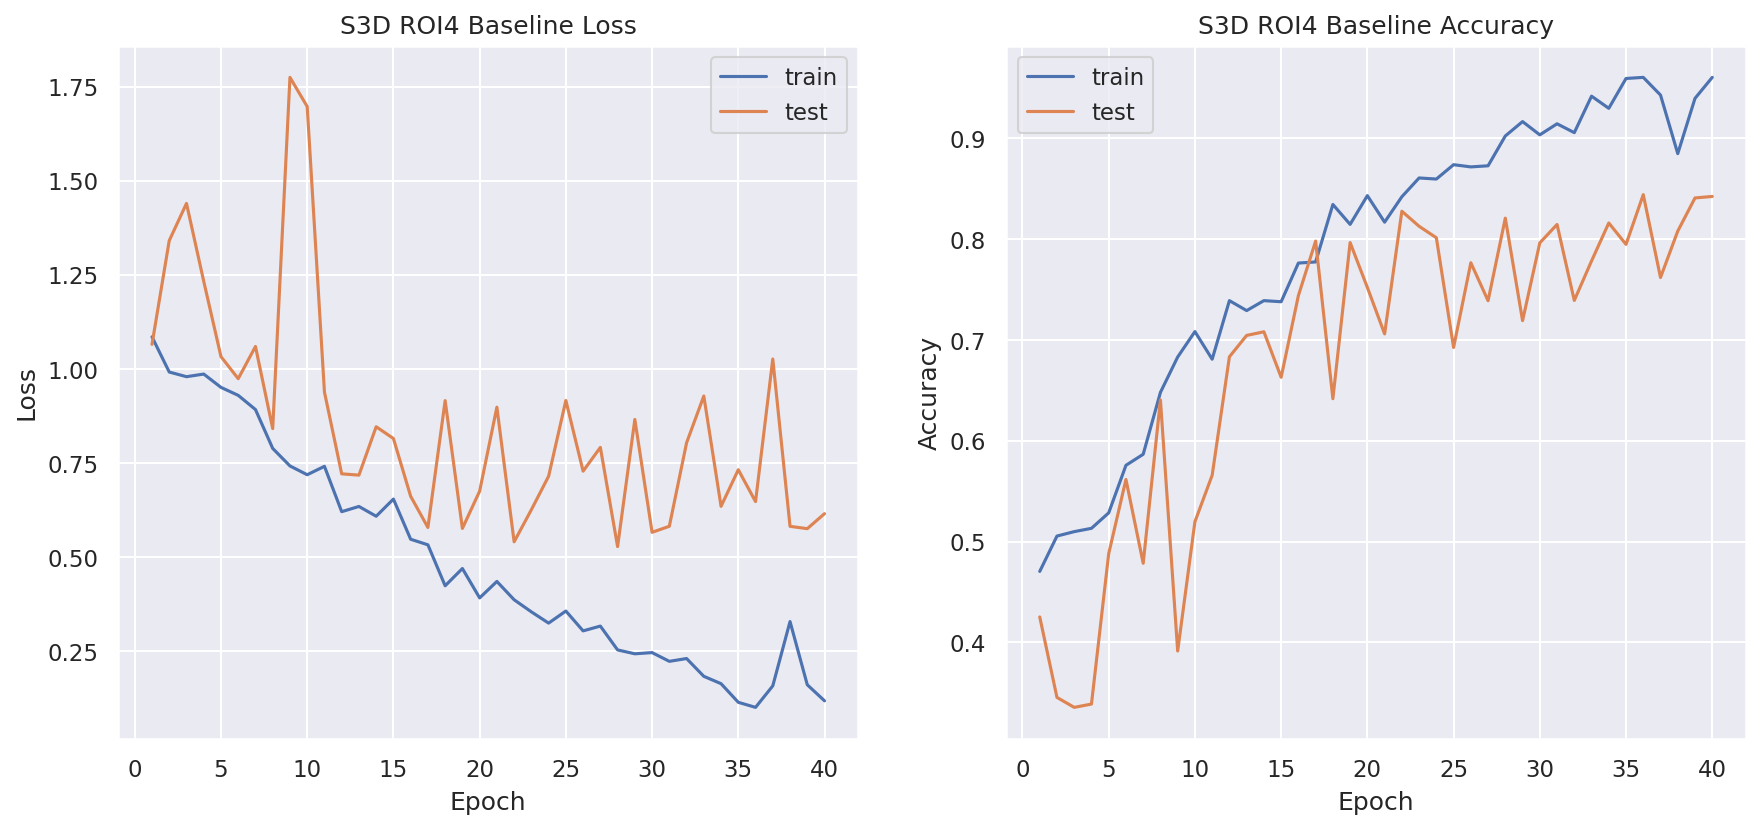

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'S3D ROI4 Baseline')

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = S3D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.8461538461538461
Precision: 0.8459845984598461
Recall: 0.8463020295837632


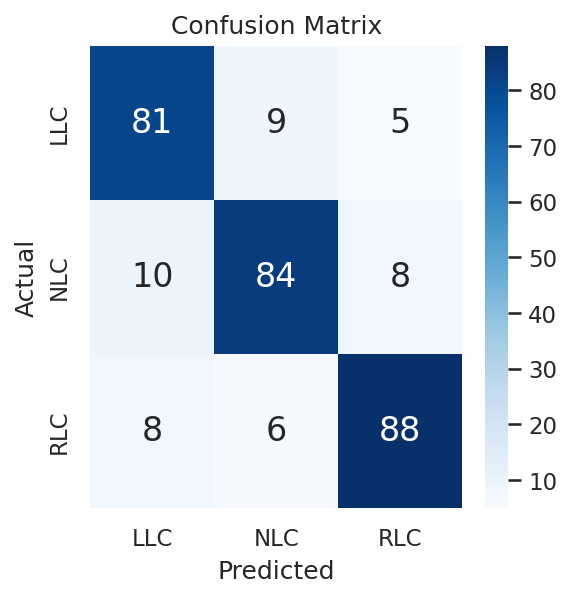

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

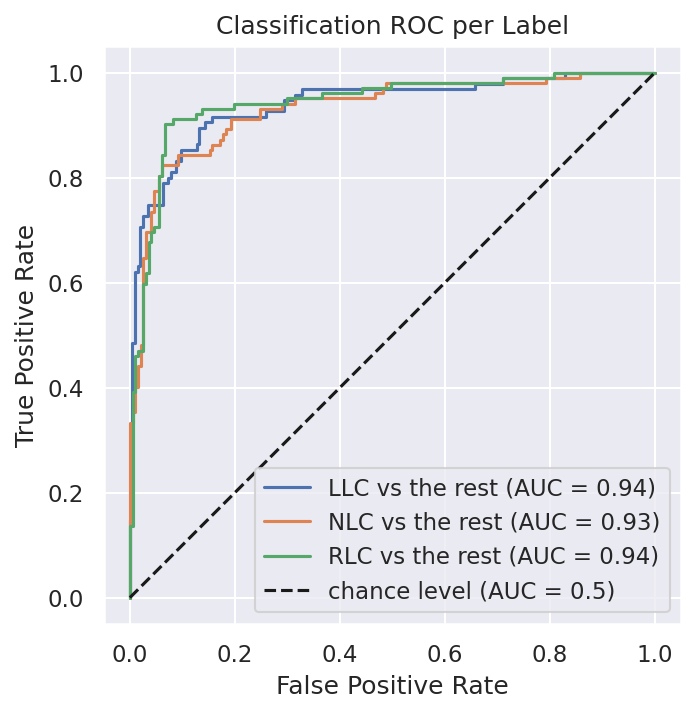

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

## **Recognition**

These experiments are for the lane change recognition tasks. Here we look at how the modell performs and how the size of the region of interest affects the performances. All the models are evaluated by their accuracy, precision, recall and ROC curves.

The training set up is the following:
- Train set size: 5100
- Test set size: 299
- Adam optimizer with a learning rate 1e-3
- Epochs: 40
- Batch size: 16

### **ROI 2**

In [ ]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 2'
train_data = VideoFolderCustom(targ_dir=train_dir, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 2'
test_data = VideoFolderCustom(targ_dir=test_dir, permute=True)

print('Training data:', len(train_data))
print('Test data:', len(test_data))

Training data: 5100
Test data: 299


In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'S3D_ROI2_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = S3D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.478, loss=1.02]


Epoch: 1 | train_loss: 1.0223 | train_acc: 0.4783 | test_loss: 0.9781 | test_acc: 0.5846


Epoch [2/40]: 100%|██████████| 319/319 [04:56<00:00,  1.08it/s, acc=0.709, loss=0.689]


Epoch: 2 | train_loss: 0.6886 | train_acc: 0.7088 | test_loss: 0.9176 | test_acc: 0.6394


Epoch [3/40]: 100%|██████████| 319/319 [04:56<00:00,  1.08it/s, acc=0.809, loss=0.488]


Epoch: 3 | train_loss: 0.4876 | train_acc: 0.8093 | test_loss: 0.6839 | test_acc: 0.7344


Epoch [4/40]: 100%|██████████| 319/319 [04:56<00:00,  1.07it/s, acc=0.851, loss=0.391]


Epoch: 4 | train_loss: 0.3913 | train_acc: 0.8513 | test_loss: 0.3885 | test_acc: 0.8586


Epoch [5/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.878, loss=0.324]


Epoch: 5 | train_loss: 0.3244 | train_acc: 0.8778 | test_loss: 0.3809 | test_acc: 0.8589


Epoch [6/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.903, loss=0.263]


Epoch: 6 | train_loss: 0.2631 | train_acc: 0.9033 | test_loss: 0.4479 | test_acc: 0.8702


Epoch [7/40]: 100%|██████████| 319/319 [04:56<00:00,  1.08it/s, acc=0.927, loss=0.208]


Epoch: 7 | train_loss: 0.2079 | train_acc: 0.9270 | test_loss: 0.3944 | test_acc: 0.8750


Epoch [8/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.94, loss=0.164]


Epoch: 8 | train_loss: 0.1636 | train_acc: 0.9399 | test_loss: 0.4445 | test_acc: 0.8618


Epoch [9/40]: 100%|██████████| 319/319 [04:56<00:00,  1.07it/s, acc=0.952, loss=0.134]


Epoch: 9 | train_loss: 0.1336 | train_acc: 0.9524 | test_loss: 0.4503 | test_acc: 0.8457


Epoch [10/40]: 100%|██████████| 319/319 [05:02<00:00,  1.06it/s, acc=0.962, loss=0.111]


Epoch: 10 | train_loss: 0.1108 | train_acc: 0.9624 | test_loss: 0.5002 | test_acc: 0.8224


Epoch [11/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.968, loss=0.0989]


Epoch: 11 | train_loss: 0.0989 | train_acc: 0.9683 | test_loss: 0.5119 | test_acc: 0.8406


Epoch [12/40]: 100%|██████████| 319/319 [04:58<00:00,  1.07it/s, acc=0.971, loss=0.0852]


Epoch: 12 | train_loss: 0.0852 | train_acc: 0.9712 | test_loss: 0.4616 | test_acc: 0.8541


Epoch [13/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.967, loss=0.0873]


Epoch: 13 | train_loss: 0.0873 | train_acc: 0.9671 | test_loss: 0.5265 | test_acc: 0.8472


Epoch [14/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.979, loss=0.0691]


Epoch: 14 | train_loss: 0.0691 | train_acc: 0.9790 | test_loss: 0.5848 | test_acc: 0.8391


Epoch [15/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.981, loss=0.058]


Epoch: 15 | train_loss: 0.0580 | train_acc: 0.9811 | test_loss: 0.5631 | test_acc: 0.8472


Epoch [16/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.972, loss=0.0712]


Epoch: 16 | train_loss: 0.0712 | train_acc: 0.9722 | test_loss: 0.4142 | test_acc: 0.8717


Epoch [17/40]: 100%|██████████| 319/319 [04:56<00:00,  1.07it/s, acc=0.987, loss=0.0367]


Epoch: 17 | train_loss: 0.0367 | train_acc: 0.9867 | test_loss: 0.6742 | test_acc: 0.8618


Epoch [18/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.984, loss=0.0472]


Epoch: 18 | train_loss: 0.0472 | train_acc: 0.9843 | test_loss: 0.5495 | test_acc: 0.8947


Epoch [19/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.984, loss=0.0514]


Epoch: 19 | train_loss: 0.0514 | train_acc: 0.9835 | test_loss: 0.6130 | test_acc: 0.8508


Epoch [20/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.984, loss=0.0447]


Epoch: 20 | train_loss: 0.0447 | train_acc: 0.9841 | test_loss: 0.5764 | test_acc: 0.8553


Epoch [21/40]: 100%|██████████| 319/319 [04:56<00:00,  1.07it/s, acc=0.985, loss=0.0443]


Epoch: 21 | train_loss: 0.0443 | train_acc: 0.9851 | test_loss: 0.5685 | test_acc: 0.8571


Epoch [22/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.981, loss=0.0575]


Epoch: 22 | train_loss: 0.0575 | train_acc: 0.9814 | test_loss: 0.4450 | test_acc: 0.8882


Epoch [23/40]: 100%|██████████| 319/319 [04:56<00:00,  1.08it/s, acc=0.993, loss=0.0248]


Epoch: 23 | train_loss: 0.0248 | train_acc: 0.9928 | test_loss: 0.5278 | test_acc: 0.8980


Epoch [24/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.991, loss=0.0272]


Epoch: 24 | train_loss: 0.0272 | train_acc: 0.9911 | test_loss: 0.5424 | test_acc: 0.8816


Epoch [25/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.986, loss=0.0404]


Epoch: 25 | train_loss: 0.0404 | train_acc: 0.9861 | test_loss: 0.5753 | test_acc: 0.8586


Epoch [26/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.986, loss=0.0362]


Epoch: 26 | train_loss: 0.0362 | train_acc: 0.9865 | test_loss: 0.6819 | test_acc: 0.8388


Epoch [27/40]: 100%|██████████| 319/319 [04:56<00:00,  1.08it/s, acc=0.984, loss=0.0452]


Epoch: 27 | train_loss: 0.0452 | train_acc: 0.9837 | test_loss: 0.6441 | test_acc: 0.8717


Epoch [28/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.99, loss=0.0297]


Epoch: 28 | train_loss: 0.0297 | train_acc: 0.9904 | test_loss: 0.5648 | test_acc: 0.8882


Epoch [29/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.995, loss=0.0142]


Epoch: 29 | train_loss: 0.0142 | train_acc: 0.9953 | test_loss: 0.7569 | test_acc: 0.8505


Epoch [30/40]: 100%|██████████| 319/319 [04:58<00:00,  1.07it/s, acc=0.981, loss=0.0569]


Epoch: 30 | train_loss: 0.0569 | train_acc: 0.9808 | test_loss: 0.6005 | test_acc: 0.8717


Epoch [31/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.992, loss=0.0254]


Epoch: 31 | train_loss: 0.0254 | train_acc: 0.9915 | test_loss: 0.5184 | test_acc: 0.8849


Epoch [32/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.996, loss=0.0136]


Epoch: 32 | train_loss: 0.0136 | train_acc: 0.9957 | test_loss: 0.5638 | test_acc: 0.8816


Epoch [33/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.998, loss=0.00835]


Epoch: 33 | train_loss: 0.0084 | train_acc: 0.9976 | test_loss: 0.6121 | test_acc: 0.8849


Epoch [34/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.989, loss=0.0328]


Epoch: 34 | train_loss: 0.0328 | train_acc: 0.9894 | test_loss: 0.6078 | test_acc: 0.8849


Epoch [35/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.987, loss=0.038]


Epoch: 35 | train_loss: 0.0380 | train_acc: 0.9873 | test_loss: 0.5687 | test_acc: 0.8684


Epoch [36/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.993, loss=0.0197]


Epoch: 36 | train_loss: 0.0197 | train_acc: 0.9933 | test_loss: 0.6161 | test_acc: 0.8684


Epoch [37/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.994, loss=0.0191]


Epoch: 37 | train_loss: 0.0191 | train_acc: 0.9941 | test_loss: 0.6554 | test_acc: 0.8487


Epoch [38/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.995, loss=0.015]


Epoch: 38 | train_loss: 0.0150 | train_acc: 0.9955 | test_loss: 0.8220 | test_acc: 0.8454


Epoch [39/40]: 100%|██████████| 319/319 [04:57<00:00,  1.07it/s, acc=0.992, loss=0.0227]


Epoch: 39 | train_loss: 0.0227 | train_acc: 0.9924 | test_loss: 0.6623 | test_acc: 0.8783


Epoch [40/40]: 100%|██████████| 319/319 [04:56<00:00,  1.07it/s, acc=0.994, loss=0.0193]


Epoch: 40 | train_loss: 0.0193 | train_acc: 0.9941 | test_loss: 0.6876 | test_acc: 0.8636
Total training time: 12481.170 seconds


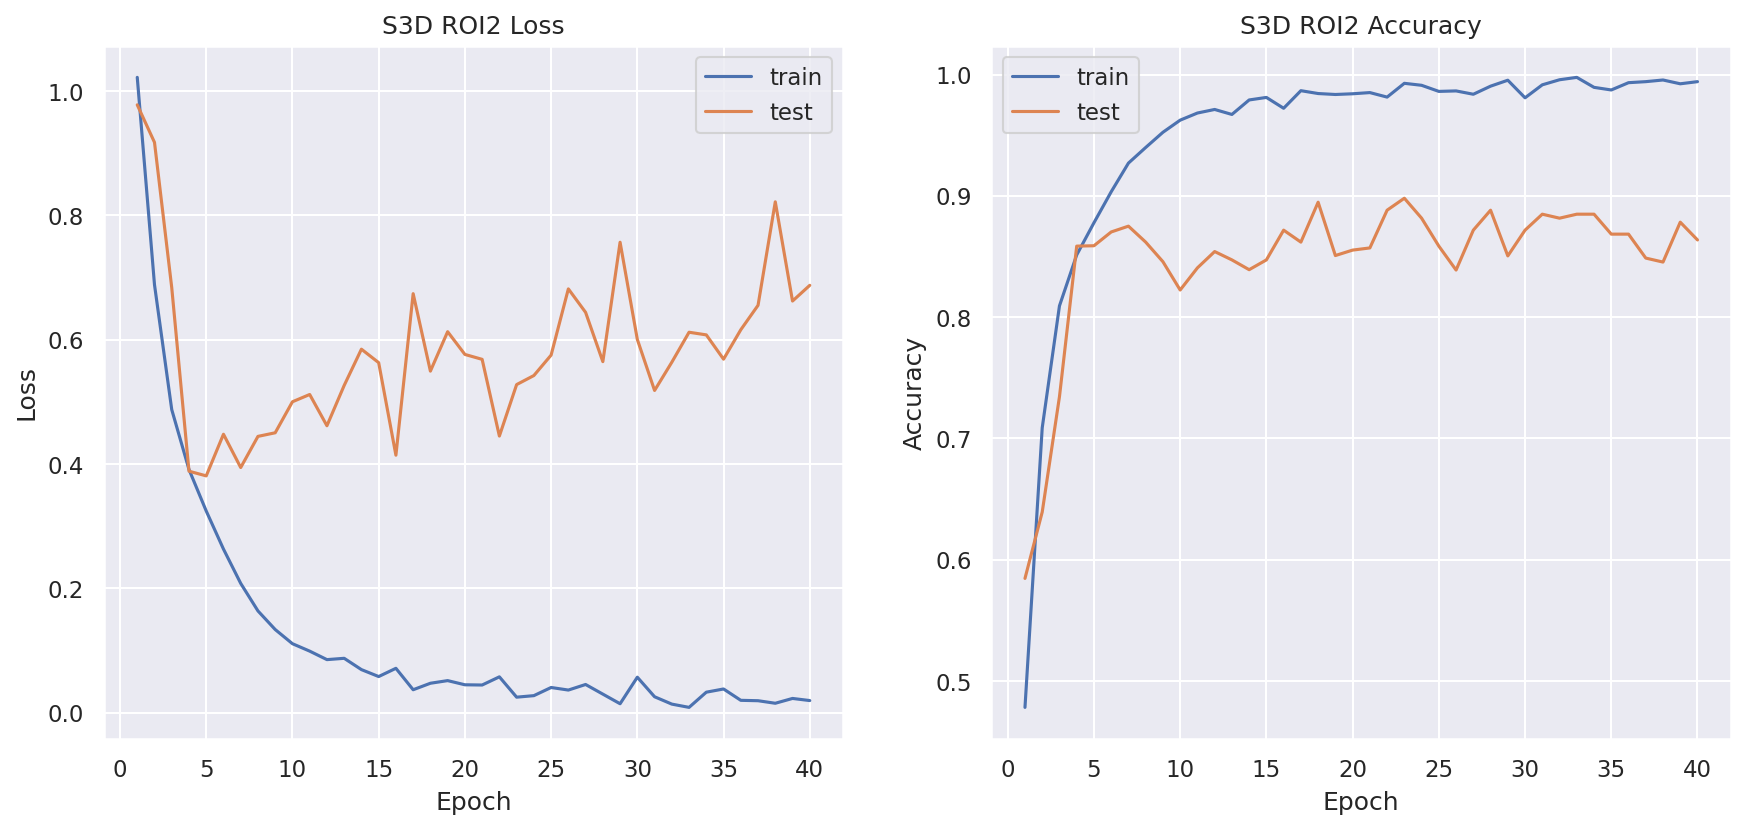

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'S3D ROI2')

**Metrics:**

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = S3D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.8963210702341137
Precision: 0.8981843844229166
Recall: 0.8960440316477468


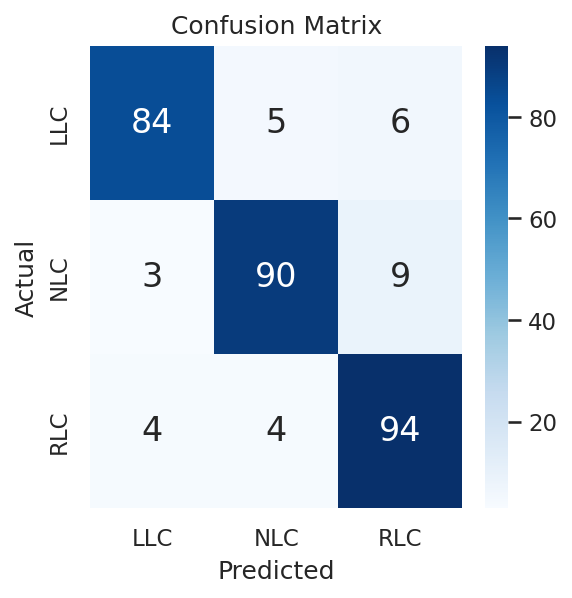

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

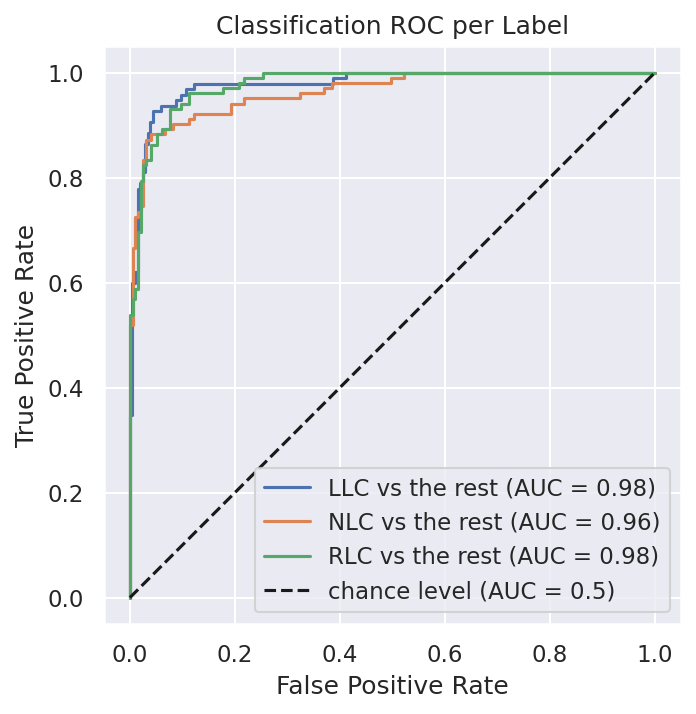

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

## **ROI 3**

In [ ]:
train_dir = './datasets/train/Recognition/ROI 3'
train_data = VideoFolderCustom(targ_dir=train_dir, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 3'
test_data = VideoFolderCustom(targ_dir=test_dir, permute=True)

In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'S3D_ROI3_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = S3D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.515, loss=0.994]


Epoch: 1 | train_loss: 0.9941 | train_acc: 0.5155 | test_loss: 1.1264 | test_acc: 0.4264


Epoch [2/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.711, loss=0.681]


Epoch: 2 | train_loss: 0.6814 | train_acc: 0.7113 | test_loss: 1.0236 | test_acc: 0.6181


Epoch [3/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.795, loss=0.515]


Epoch: 3 | train_loss: 0.5147 | train_acc: 0.7948 | test_loss: 0.5235 | test_acc: 0.8134


Epoch [4/40]: 100%|██████████| 319/319 [05:02<00:00,  1.06it/s, acc=0.852, loss=0.394]


Epoch: 4 | train_loss: 0.3938 | train_acc: 0.8516 | test_loss: 0.4937 | test_acc: 0.8424


Epoch [5/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.885, loss=0.297]


Epoch: 5 | train_loss: 0.2972 | train_acc: 0.8854 | test_loss: 0.6775 | test_acc: 0.7996


Epoch [6/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.915, loss=0.235]


Epoch: 6 | train_loss: 0.2352 | train_acc: 0.9146 | test_loss: 0.5240 | test_acc: 0.8292


Epoch [7/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.925, loss=0.199]


Epoch: 7 | train_loss: 0.1994 | train_acc: 0.9252 | test_loss: 0.4135 | test_acc: 0.8816


Epoch [8/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.941, loss=0.161]


Epoch: 8 | train_loss: 0.1607 | train_acc: 0.9412 | test_loss: 0.4462 | test_acc: 0.8538


Epoch [9/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.943, loss=0.152]


Epoch: 9 | train_loss: 0.1517 | train_acc: 0.9432 | test_loss: 0.8444 | test_acc: 0.7721


Epoch [10/40]: 100%|██████████| 319/319 [05:02<00:00,  1.06it/s, acc=0.953, loss=0.127]


Epoch: 10 | train_loss: 0.1271 | train_acc: 0.9532 | test_loss: 0.4787 | test_acc: 0.8783


Epoch [11/40]: 100%|██████████| 319/319 [05:00<00:00,  1.06it/s, acc=0.965, loss=0.103]


Epoch: 11 | train_loss: 0.1032 | train_acc: 0.9645 | test_loss: 0.4959 | test_acc: 0.8571


Epoch [12/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.973, loss=0.0806]


Epoch: 12 | train_loss: 0.0806 | train_acc: 0.9726 | test_loss: 0.5670 | test_acc: 0.8325


Epoch [13/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.974, loss=0.0846]


Epoch: 13 | train_loss: 0.0846 | train_acc: 0.9736 | test_loss: 0.4834 | test_acc: 0.8702


Epoch [14/40]: 100%|██████████| 319/319 [05:10<00:00,  1.03it/s, acc=0.972, loss=0.08]


Epoch: 14 | train_loss: 0.0800 | train_acc: 0.9718 | test_loss: 0.4917 | test_acc: 0.8947


Epoch [15/40]: 100%|██████████| 319/319 [05:10<00:00,  1.03it/s, acc=0.968, loss=0.0879]


Epoch: 15 | train_loss: 0.0879 | train_acc: 0.9685 | test_loss: 0.8416 | test_acc: 0.8197


Epoch [16/40]: 100%|██████████| 319/319 [05:10<00:00,  1.03it/s, acc=0.981, loss=0.058]


Epoch: 16 | train_loss: 0.0580 | train_acc: 0.9809 | test_loss: 0.5548 | test_acc: 0.8684


Epoch [17/40]: 100%|██████████| 319/319 [05:10<00:00,  1.03it/s, acc=0.976, loss=0.0646]


Epoch: 17 | train_loss: 0.0646 | train_acc: 0.9755 | test_loss: 0.7860 | test_acc: 0.8325


Epoch [18/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.976, loss=0.0649]


Epoch: 18 | train_loss: 0.0649 | train_acc: 0.9765 | test_loss: 0.4897 | test_acc: 0.8867


Epoch [19/40]: 100%|██████████| 319/319 [05:11<00:00,  1.02it/s, acc=0.981, loss=0.0575]


Epoch: 19 | train_loss: 0.0575 | train_acc: 0.9810 | test_loss: 0.4300 | test_acc: 0.9243


Epoch [20/40]: 100%|██████████| 319/319 [05:10<00:00,  1.03it/s, acc=0.987, loss=0.0397]


Epoch: 20 | train_loss: 0.0397 | train_acc: 0.9869 | test_loss: 0.5608 | test_acc: 0.8816


Epoch [21/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.984, loss=0.0475]


Epoch: 21 | train_loss: 0.0475 | train_acc: 0.9843 | test_loss: 0.6627 | test_acc: 0.8606


Epoch [22/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.982, loss=0.0469]


Epoch: 22 | train_loss: 0.0469 | train_acc: 0.9822 | test_loss: 1.0728 | test_acc: 0.8113


Epoch [23/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.987, loss=0.0382]


Epoch: 23 | train_loss: 0.0382 | train_acc: 0.9869 | test_loss: 0.8555 | test_acc: 0.8278


Epoch [24/40]: 100%|██████████| 319/319 [05:10<00:00,  1.03it/s, acc=0.978, loss=0.0654]


Epoch: 24 | train_loss: 0.0654 | train_acc: 0.9777 | test_loss: 0.7161 | test_acc: 0.8571


Epoch [25/40]: 100%|██████████| 319/319 [05:09<00:00,  1.03it/s, acc=0.992, loss=0.0215]


Epoch: 25 | train_loss: 0.0215 | train_acc: 0.9920 | test_loss: 0.5992 | test_acc: 0.8717


Epoch [26/40]: 100%|██████████| 319/319 [05:02<00:00,  1.06it/s, acc=0.996, loss=0.0115]


Epoch: 26 | train_loss: 0.0115 | train_acc: 0.9961 | test_loss: 0.7463 | test_acc: 0.8735


Epoch [27/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.984, loss=0.0545]


Epoch: 27 | train_loss: 0.0545 | train_acc: 0.9835 | test_loss: 0.5277 | test_acc: 0.8834


Epoch [28/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.982, loss=0.0498]


Epoch: 28 | train_loss: 0.0498 | train_acc: 0.9824 | test_loss: 0.5990 | test_acc: 0.8735


Epoch [29/40]: 100%|██████████| 319/319 [05:02<00:00,  1.05it/s, acc=0.994, loss=0.015]


Epoch: 29 | train_loss: 0.0150 | train_acc: 0.9943 | test_loss: 0.6086 | test_acc: 0.8965


Epoch [30/40]: 100%|██████████| 319/319 [05:01<00:00,  1.06it/s, acc=0.988, loss=0.0347]


Epoch: 30 | train_loss: 0.0347 | train_acc: 0.9878 | test_loss: 0.5383 | test_acc: 0.8917


Epoch [31/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.987, loss=0.0401]


Epoch: 31 | train_loss: 0.0401 | train_acc: 0.9874 | test_loss: 0.6727 | test_acc: 0.8669


Epoch [32/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.99, loss=0.0318]


Epoch: 32 | train_loss: 0.0318 | train_acc: 0.9898 | test_loss: 0.7696 | test_acc: 0.8520


Epoch [33/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.993, loss=0.0198]


Epoch: 33 | train_loss: 0.0198 | train_acc: 0.9931 | test_loss: 0.5470 | test_acc: 0.8914


Epoch [34/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.991, loss=0.025]


Epoch: 34 | train_loss: 0.0250 | train_acc: 0.9910 | test_loss: 0.5974 | test_acc: 0.8914


Epoch [35/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.989, loss=0.0301]


Epoch: 35 | train_loss: 0.0301 | train_acc: 0.9892 | test_loss: 0.7679 | test_acc: 0.8618


Epoch [36/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.985, loss=0.0417]


Epoch: 36 | train_loss: 0.0417 | train_acc: 0.9853 | test_loss: 0.8156 | test_acc: 0.8505


Epoch [37/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.993, loss=0.021]


Epoch: 37 | train_loss: 0.0210 | train_acc: 0.9929 | test_loss: 0.7352 | test_acc: 0.8669


Epoch [38/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.996, loss=0.0108]


Epoch: 38 | train_loss: 0.0108 | train_acc: 0.9963 | test_loss: 0.7402 | test_acc: 0.8768


Epoch [39/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.993, loss=0.0233]


Epoch: 39 | train_loss: 0.0233 | train_acc: 0.9926 | test_loss: 0.7927 | test_acc: 0.8702


Epoch [40/40]: 100%|██████████| 319/319 [05:02<00:00,  1.05it/s, acc=0.993, loss=0.0233]


Epoch: 40 | train_loss: 0.0233 | train_acc: 0.9928 | test_loss: 0.5421 | test_acc: 0.8801
Total training time: 12784.847 seconds


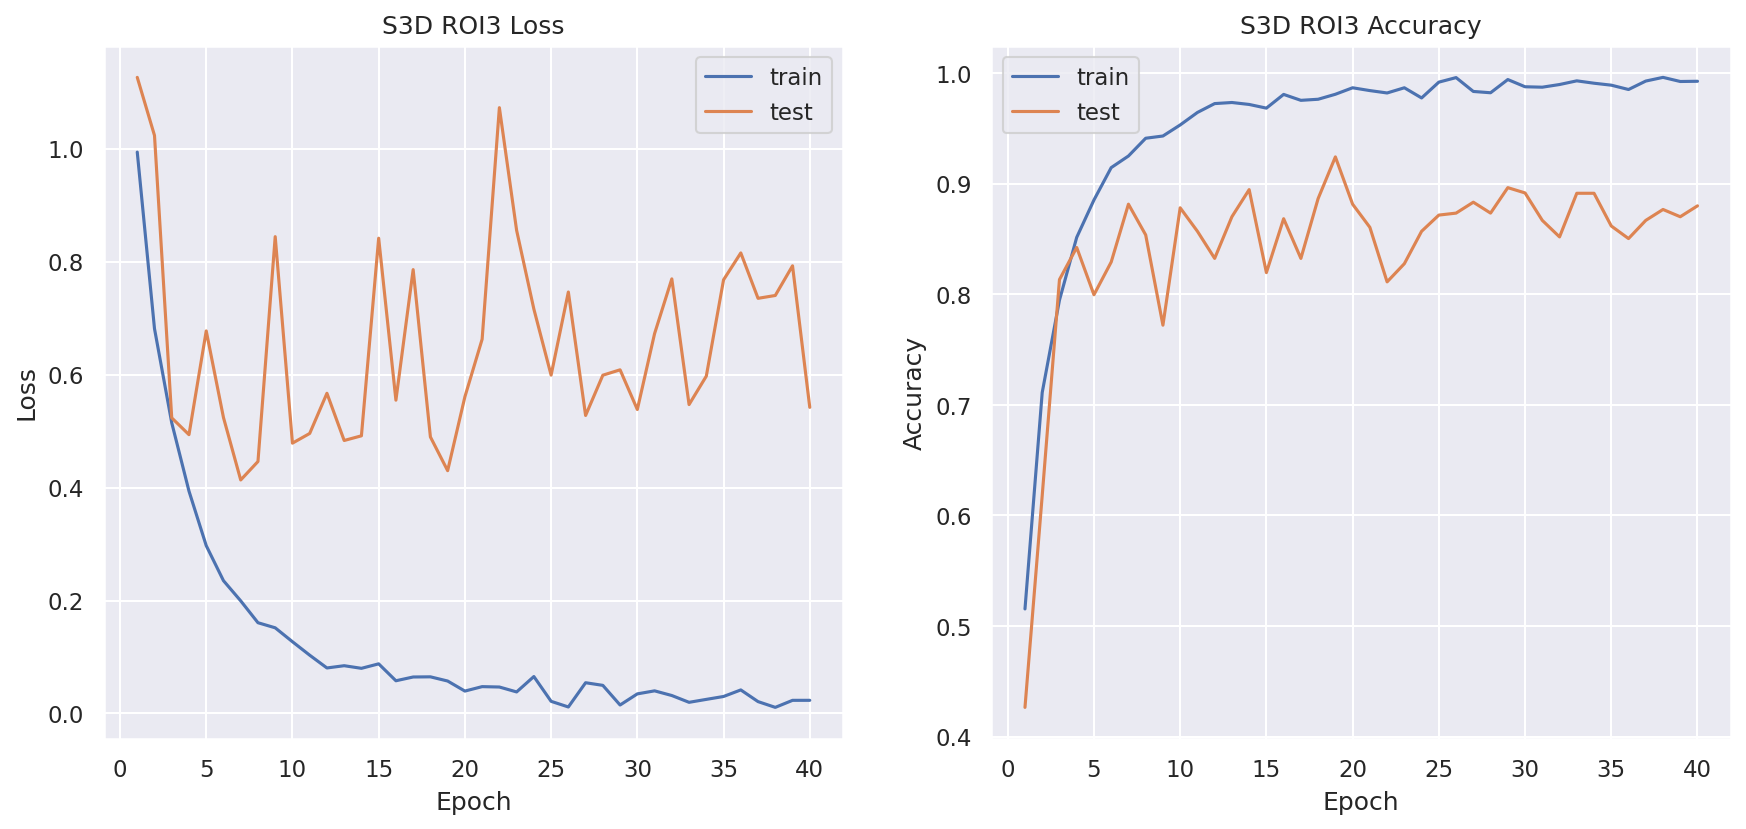

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'S3D ROI3')

**Metrics:**

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = S3D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.9230769230769231
Precision: 0.9240946499548053
Recall: 0.9226694186446508


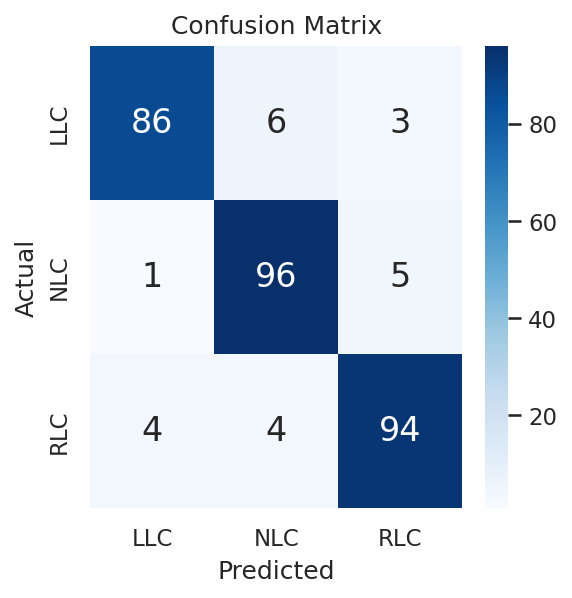

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

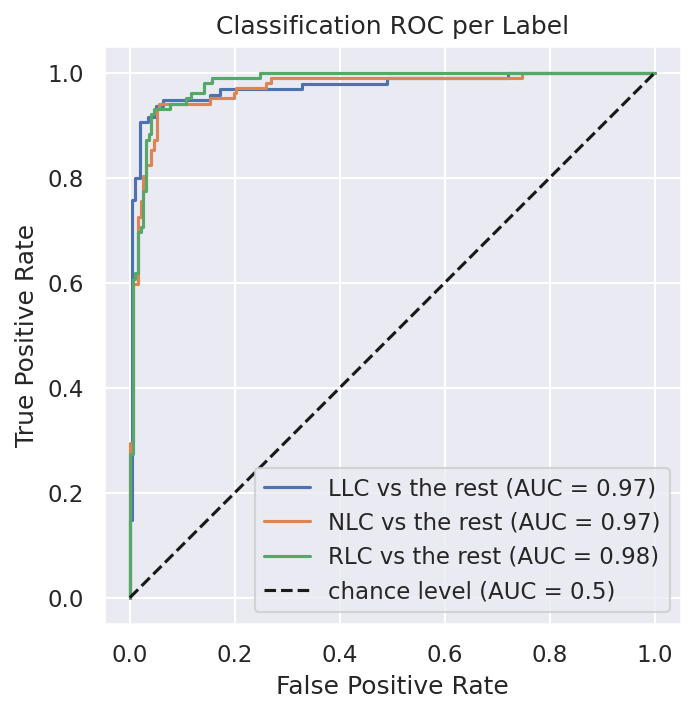

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

## **ROI 4**

In [ ]:
train_dir = './datasets/train/Recognition/ROI 4'
train_data = VideoFolderCustom(targ_dir=train_dir, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 4'
test_data = VideoFolderCustom(targ_dir=test_dir, permute=True)

In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'S3D_ROI4_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = S3D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.504, loss=1.01]


Epoch: 1 | train_loss: 1.0110 | train_acc: 0.5042 | test_loss: 1.0831 | test_acc: 0.4474


Epoch [2/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.636, loss=0.801]


Epoch: 2 | train_loss: 0.8012 | train_acc: 0.6355 | test_loss: 0.8129 | test_acc: 0.6684


Epoch [3/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.758, loss=0.583]


Epoch: 3 | train_loss: 0.5833 | train_acc: 0.7579 | test_loss: 1.1593 | test_acc: 0.5640


Epoch [4/40]: 100%|██████████| 319/319 [05:02<00:00,  1.06it/s, acc=0.816, loss=0.459]


Epoch: 4 | train_loss: 0.4594 | train_acc: 0.8162 | test_loss: 0.5244 | test_acc: 0.8002


Epoch [5/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.858, loss=0.371]


Epoch: 5 | train_loss: 0.3708 | train_acc: 0.8583 | test_loss: 0.6294 | test_acc: 0.7748


Epoch [6/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.89, loss=0.294]


Epoch: 6 | train_loss: 0.2941 | train_acc: 0.8900 | test_loss: 0.4577 | test_acc: 0.8340


Epoch [7/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.916, loss=0.225]


Epoch: 7 | train_loss: 0.2252 | train_acc: 0.9156 | test_loss: 0.4135 | test_acc: 0.8624


Epoch [8/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.929, loss=0.193]


Epoch: 8 | train_loss: 0.1932 | train_acc: 0.9289 | test_loss: 0.4513 | test_acc: 0.8556


Epoch [9/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.942, loss=0.157]


Epoch: 9 | train_loss: 0.1570 | train_acc: 0.9424 | test_loss: 0.5016 | test_acc: 0.8669


Epoch [10/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.961, loss=0.112]


Epoch: 10 | train_loss: 0.1125 | train_acc: 0.9608 | test_loss: 0.6873 | test_acc: 0.8454


Epoch [11/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.955, loss=0.126]


Epoch: 11 | train_loss: 0.1261 | train_acc: 0.9551 | test_loss: 0.5981 | test_acc: 0.8376


Epoch [12/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.966, loss=0.0939]


Epoch: 12 | train_loss: 0.0939 | train_acc: 0.9656 | test_loss: 0.6115 | test_acc: 0.8376


Epoch [13/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.969, loss=0.0962]


Epoch: 13 | train_loss: 0.0962 | train_acc: 0.9688 | test_loss: 0.6118 | test_acc: 0.8358


Epoch [14/40]: 100%|██████████| 319/319 [05:09<00:00,  1.03it/s, acc=0.97, loss=0.0834]


Epoch: 14 | train_loss: 0.0834 | train_acc: 0.9696 | test_loss: 0.6064 | test_acc: 0.8343


Epoch [15/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.98, loss=0.0566]


Epoch: 15 | train_loss: 0.0566 | train_acc: 0.9802 | test_loss: 0.6682 | test_acc: 0.8651


Epoch [16/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.976, loss=0.0696]


Epoch: 16 | train_loss: 0.0696 | train_acc: 0.9761 | test_loss: 0.8857 | test_acc: 0.8340


Epoch [17/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.977, loss=0.064]


Epoch: 17 | train_loss: 0.0640 | train_acc: 0.9771 | test_loss: 0.4935 | test_acc: 0.8932


Epoch [18/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.986, loss=0.0413]


Epoch: 18 | train_loss: 0.0413 | train_acc: 0.9855 | test_loss: 0.4681 | test_acc: 0.8998


Epoch [19/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.978, loss=0.0566]


Epoch: 19 | train_loss: 0.0566 | train_acc: 0.9783 | test_loss: 0.6852 | test_acc: 0.8702


Epoch [20/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.984, loss=0.0436]


Epoch: 20 | train_loss: 0.0436 | train_acc: 0.9839 | test_loss: 0.5308 | test_acc: 0.8849


Epoch [21/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.983, loss=0.0458]


Epoch: 21 | train_loss: 0.0458 | train_acc: 0.9830 | test_loss: 0.8656 | test_acc: 0.8391


Epoch [22/40]: 100%|██████████| 319/319 [05:09<00:00,  1.03it/s, acc=0.984, loss=0.062]


Epoch: 22 | train_loss: 0.0620 | train_acc: 0.9836 | test_loss: 0.6043 | test_acc: 0.8684


Epoch [23/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.989, loss=0.0373]


Epoch: 23 | train_loss: 0.0373 | train_acc: 0.9886 | test_loss: 0.7317 | test_acc: 0.8717


Epoch [24/40]: 100%|██████████| 319/319 [05:05<00:00,  1.05it/s, acc=0.991, loss=0.0275]


Epoch: 24 | train_loss: 0.0275 | train_acc: 0.9908 | test_loss: 0.6097 | test_acc: 0.8834


Epoch [25/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.989, loss=0.0322]


Epoch: 25 | train_loss: 0.0322 | train_acc: 0.9888 | test_loss: 0.6664 | test_acc: 0.8654


Epoch [26/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.987, loss=0.0368]


Epoch: 26 | train_loss: 0.0368 | train_acc: 0.9869 | test_loss: 0.7710 | test_acc: 0.8654


Epoch [27/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.994, loss=0.0212]


Epoch: 27 | train_loss: 0.0212 | train_acc: 0.9937 | test_loss: 0.6973 | test_acc: 0.8852


Epoch [28/40]: 100%|██████████| 319/319 [05:05<00:00,  1.05it/s, acc=0.988, loss=0.039]


Epoch: 28 | train_loss: 0.0390 | train_acc: 0.9879 | test_loss: 0.6109 | test_acc: 0.8852


Epoch [29/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.985, loss=0.0448]


Epoch: 29 | train_loss: 0.0448 | train_acc: 0.9851 | test_loss: 0.5507 | test_acc: 0.8914


Epoch [30/40]: 100%|██████████| 319/319 [05:09<00:00,  1.03it/s, acc=0.995, loss=0.0183]


Epoch: 30 | train_loss: 0.0183 | train_acc: 0.9945 | test_loss: 0.6312 | test_acc: 0.8735


Epoch [31/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.998, loss=0.00499]


Epoch: 31 | train_loss: 0.0050 | train_acc: 0.9982 | test_loss: 0.7297 | test_acc: 0.8816


Epoch [32/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.981, loss=0.0555]


Epoch: 32 | train_loss: 0.0555 | train_acc: 0.9814 | test_loss: 0.6184 | test_acc: 0.8914


Epoch [33/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.995, loss=0.0158]


Epoch: 33 | train_loss: 0.0158 | train_acc: 0.9949 | test_loss: 0.6361 | test_acc: 0.8556


Epoch [34/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.993, loss=0.0223]


Epoch: 34 | train_loss: 0.0223 | train_acc: 0.9926 | test_loss: 0.8263 | test_acc: 0.8618


Epoch [35/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.985, loss=0.0425]


Epoch: 35 | train_loss: 0.0425 | train_acc: 0.9851 | test_loss: 0.9056 | test_acc: 0.8460


Epoch [36/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.991, loss=0.024]


Epoch: 36 | train_loss: 0.0240 | train_acc: 0.9908 | test_loss: 0.8169 | test_acc: 0.8654


Epoch [37/40]: 100%|██████████| 319/319 [05:08<00:00,  1.03it/s, acc=0.995, loss=0.0176]


Epoch: 37 | train_loss: 0.0176 | train_acc: 0.9945 | test_loss: 0.8102 | test_acc: 0.8816


Epoch [38/40]: 100%|██████████| 319/319 [05:09<00:00,  1.03it/s, acc=0.992, loss=0.024]


Epoch: 38 | train_loss: 0.0240 | train_acc: 0.9918 | test_loss: 0.8038 | test_acc: 0.8603


Epoch [39/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.984, loss=0.0507]


Epoch: 39 | train_loss: 0.0507 | train_acc: 0.9835 | test_loss: 0.6442 | test_acc: 0.8819


Epoch [40/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.993, loss=0.0193]


Epoch: 40 | train_loss: 0.0193 | train_acc: 0.9928 | test_loss: 0.5692 | test_acc: 0.8786
Total training time: 12796.233 seconds


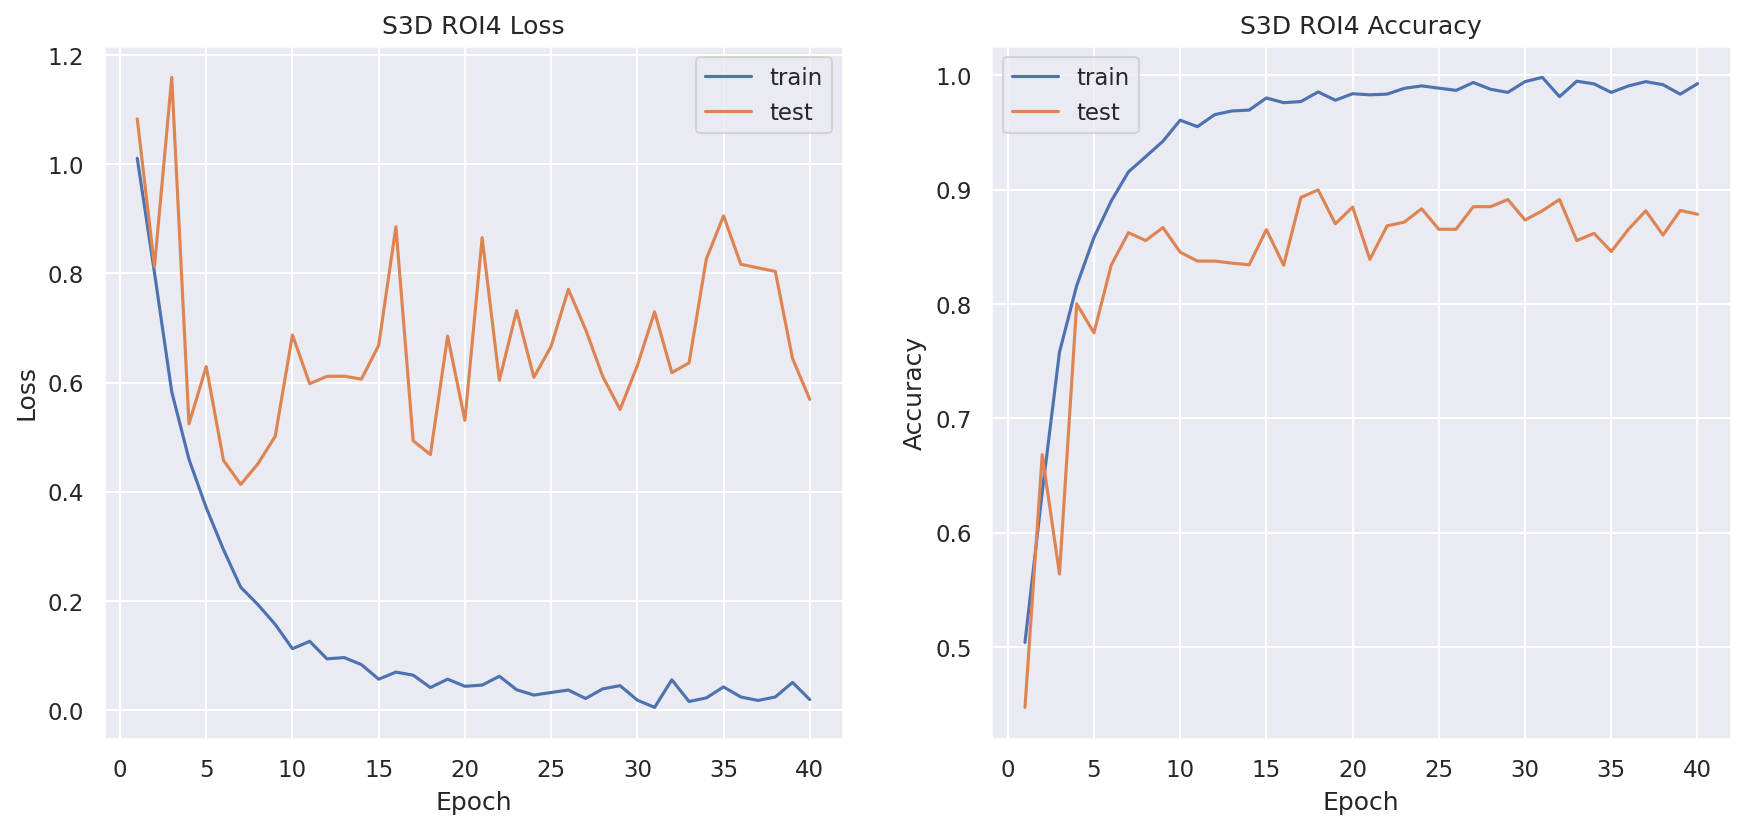

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'S3D ROI4')

**Metrics:**

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = S3D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.8996655518394648
Precision: 0.8995622895622897
Recall: 0.8997936016511868


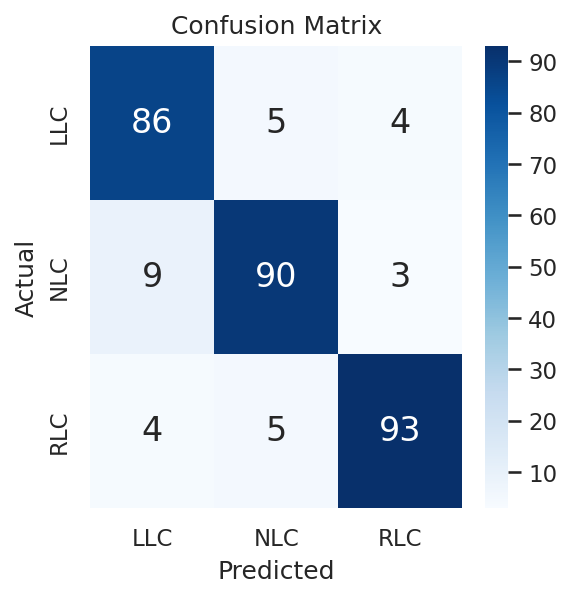

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

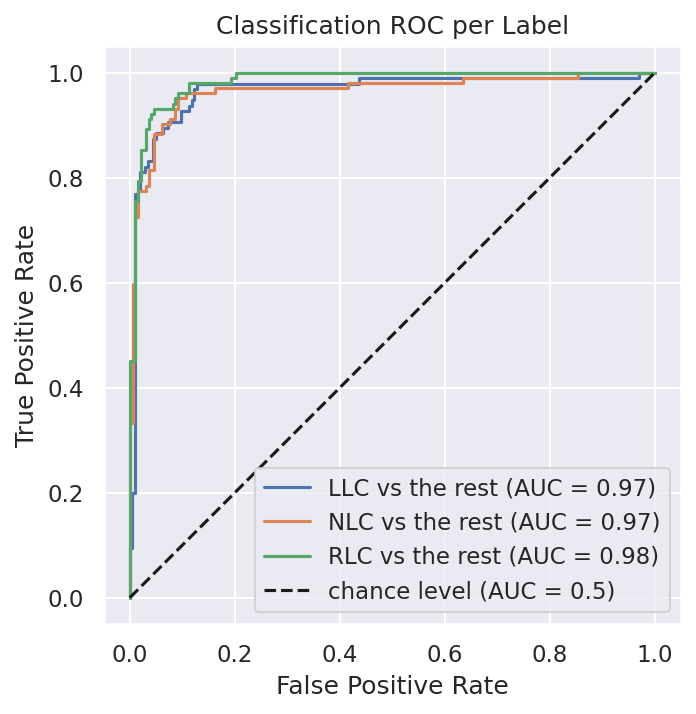

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

## **Prediction**

These experiments are for the lane change prediction task. Here we look at how the model performs on trying to predict the lane changes using the best ROI from the recognition experiments. All the models are again evaluated by their accuracy, precision, recall and ROC curves.

The training set up is the same as above.

In [ ]:
# setup videofolder to download the data with ROI x2
train_dir = './datasets/train/Prediction/ROI 2'
train_data = VideoFolderCustom(targ_dir=train_dir, permute=True, augmented=True)

test_dir = './datasets/test/Prediction/ROI 2'
test_data = VideoFolderCustom(targ_dir=test_dir, permute=True)

print('Training data:', len(train_data))
print('Test data:', len(test_data))

Training data: 5100
Test data: 299


In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'S3D_ROI2_prediction')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = S3D(num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [05:05<00:00,  1.05it/s, acc=0.442, loss=1.05]


Epoch: 1 | train_loss: 1.0469 | train_acc: 0.4417 | test_loss: 1.0736 | test_acc: 0.4809


Epoch [2/40]: 100%|██████████| 319/319 [05:05<00:00,  1.05it/s, acc=0.523, loss=0.957]


Epoch: 2 | train_loss: 0.9571 | train_acc: 0.5227 | test_loss: 0.9078 | test_acc: 0.5715


Epoch [3/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.584, loss=0.894]


Epoch: 3 | train_loss: 0.8943 | train_acc: 0.5842 | test_loss: 0.9352 | test_acc: 0.6011


Epoch [4/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.623, loss=0.846]


Epoch: 4 | train_loss: 0.8459 | train_acc: 0.6226 | test_loss: 0.8335 | test_acc: 0.6408


Epoch [5/40]: 100%|██████████| 319/319 [05:11<00:00,  1.03it/s, acc=0.671, loss=0.765]


Epoch: 5 | train_loss: 0.7650 | train_acc: 0.6710 | test_loss: 0.7800 | test_acc: 0.6896


Epoch [6/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.714, loss=0.686]


Epoch: 6 | train_loss: 0.6860 | train_acc: 0.7143 | test_loss: 0.8294 | test_acc: 0.6719


Epoch [7/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.745, loss=0.623]


Epoch: 7 | train_loss: 0.6232 | train_acc: 0.7450 | test_loss: 0.7747 | test_acc: 0.6684


Epoch [8/40]: 100%|██████████| 319/319 [05:05<00:00,  1.05it/s, acc=0.777, loss=0.557]


Epoch: 8 | train_loss: 0.5570 | train_acc: 0.7768 | test_loss: 0.7979 | test_acc: 0.6749


Epoch [9/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.807, loss=0.482]


Epoch: 9 | train_loss: 0.4821 | train_acc: 0.8068 | test_loss: 1.1276 | test_acc: 0.6083


Epoch [10/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.831, loss=0.436]


Epoch: 10 | train_loss: 0.4364 | train_acc: 0.8305 | test_loss: 0.9895 | test_acc: 0.6388


Epoch [11/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.861, loss=0.367]


Epoch: 11 | train_loss: 0.3667 | train_acc: 0.8606 | test_loss: 1.1323 | test_acc: 0.6361


Epoch [12/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.877, loss=0.323]


Epoch: 12 | train_loss: 0.3227 | train_acc: 0.8768 | test_loss: 0.8712 | test_acc: 0.7042


Epoch [13/40]: 100%|██████████| 319/319 [05:12<00:00,  1.02it/s, acc=0.898, loss=0.278]


Epoch: 13 | train_loss: 0.2775 | train_acc: 0.8984 | test_loss: 0.8699 | test_acc: 0.7063


Epoch [14/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.914, loss=0.228]


Epoch: 14 | train_loss: 0.2284 | train_acc: 0.9139 | test_loss: 0.9145 | test_acc: 0.6767


Epoch [15/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.928, loss=0.201]


Epoch: 15 | train_loss: 0.2007 | train_acc: 0.9282 | test_loss: 0.9779 | test_acc: 0.6782


Epoch [16/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.939, loss=0.163]


Epoch: 16 | train_loss: 0.1631 | train_acc: 0.9386 | test_loss: 1.0417 | test_acc: 0.7425


Epoch [17/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.944, loss=0.161]


Epoch: 17 | train_loss: 0.1610 | train_acc: 0.9441 | test_loss: 1.2979 | test_acc: 0.6588


Epoch [18/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.95, loss=0.134]


Epoch: 18 | train_loss: 0.1342 | train_acc: 0.9498 | test_loss: 1.0904 | test_acc: 0.6881


Epoch [19/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.955, loss=0.127]


Epoch: 19 | train_loss: 0.1275 | train_acc: 0.9547 | test_loss: 1.1020 | test_acc: 0.6977


Epoch [20/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.962, loss=0.105]


Epoch: 20 | train_loss: 0.1047 | train_acc: 0.9616 | test_loss: 0.9698 | test_acc: 0.7060


Epoch [21/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.962, loss=0.107]


Epoch: 21 | train_loss: 0.1073 | train_acc: 0.9618 | test_loss: 0.9491 | test_acc: 0.7240


Epoch [22/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.966, loss=0.0904]


Epoch: 22 | train_loss: 0.0904 | train_acc: 0.9663 | test_loss: 1.3228 | test_acc: 0.6651


Epoch [23/40]: 100%|██████████| 319/319 [05:09<00:00,  1.03it/s, acc=0.96, loss=0.107]


Epoch: 23 | train_loss: 0.1066 | train_acc: 0.9596 | test_loss: 1.1526 | test_acc: 0.7258


Epoch [24/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.973, loss=0.0753]


Epoch: 24 | train_loss: 0.0753 | train_acc: 0.9728 | test_loss: 1.1499 | test_acc: 0.7144


Epoch [25/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.975, loss=0.0725]


Epoch: 25 | train_loss: 0.0725 | train_acc: 0.9753 | test_loss: 1.1588 | test_acc: 0.7195


Epoch [26/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.965, loss=0.0993]


Epoch: 26 | train_loss: 0.0993 | train_acc: 0.9647 | test_loss: 1.0433 | test_acc: 0.7144


Epoch [27/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.984, loss=0.0495]


Epoch: 27 | train_loss: 0.0495 | train_acc: 0.9837 | test_loss: 1.3833 | test_acc: 0.6881


Epoch [28/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.969, loss=0.0796]


Epoch: 28 | train_loss: 0.0796 | train_acc: 0.9692 | test_loss: 1.1891 | test_acc: 0.7356


Epoch [29/40]: 100%|██████████| 319/319 [05:03<00:00,  1.05it/s, acc=0.981, loss=0.058]


Epoch: 29 | train_loss: 0.0580 | train_acc: 0.9806 | test_loss: 1.2286 | test_acc: 0.7210


Epoch [30/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.977, loss=0.0647]


Epoch: 30 | train_loss: 0.0647 | train_acc: 0.9769 | test_loss: 1.4433 | test_acc: 0.7162


Epoch [31/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.984, loss=0.0434]


Epoch: 31 | train_loss: 0.0434 | train_acc: 0.9837 | test_loss: 1.5233 | test_acc: 0.6950


Epoch [32/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.981, loss=0.0473]


Epoch: 32 | train_loss: 0.0473 | train_acc: 0.9812 | test_loss: 1.3965 | test_acc: 0.7093


Epoch [33/40]: 100%|██████████| 319/319 [05:07<00:00,  1.04it/s, acc=0.979, loss=0.0542]


Epoch: 33 | train_loss: 0.0542 | train_acc: 0.9792 | test_loss: 1.4250 | test_acc: 0.7126


Epoch [34/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.982, loss=0.0568]


Epoch: 34 | train_loss: 0.0568 | train_acc: 0.9818 | test_loss: 1.2856 | test_acc: 0.7374


Epoch [35/40]: 100%|██████████| 319/319 [05:05<00:00,  1.04it/s, acc=0.982, loss=0.0458]


Epoch: 35 | train_loss: 0.0458 | train_acc: 0.9825 | test_loss: 1.6291 | test_acc: 0.6752


Epoch [36/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.982, loss=0.0517]


Epoch: 36 | train_loss: 0.0517 | train_acc: 0.9815 | test_loss: 1.6555 | test_acc: 0.7327


Epoch [37/40]: 100%|██████████| 319/319 [05:04<00:00,  1.05it/s, acc=0.984, loss=0.0499]


Epoch: 37 | train_loss: 0.0499 | train_acc: 0.9841 | test_loss: 1.3951 | test_acc: 0.7374


Epoch [38/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.991, loss=0.0268]


Epoch: 38 | train_loss: 0.0268 | train_acc: 0.9910 | test_loss: 2.2741 | test_acc: 0.6785


Epoch [39/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.979, loss=0.0578]


Epoch: 39 | train_loss: 0.0578 | train_acc: 0.9786 | test_loss: 1.2828 | test_acc: 0.7177


Epoch [40/40]: 100%|██████████| 319/319 [05:06<00:00,  1.04it/s, acc=0.985, loss=0.0377]


Epoch: 40 | train_loss: 0.0377 | train_acc: 0.9853 | test_loss: 1.4783 | test_acc: 0.6818
Total training time: 12829.499 seconds


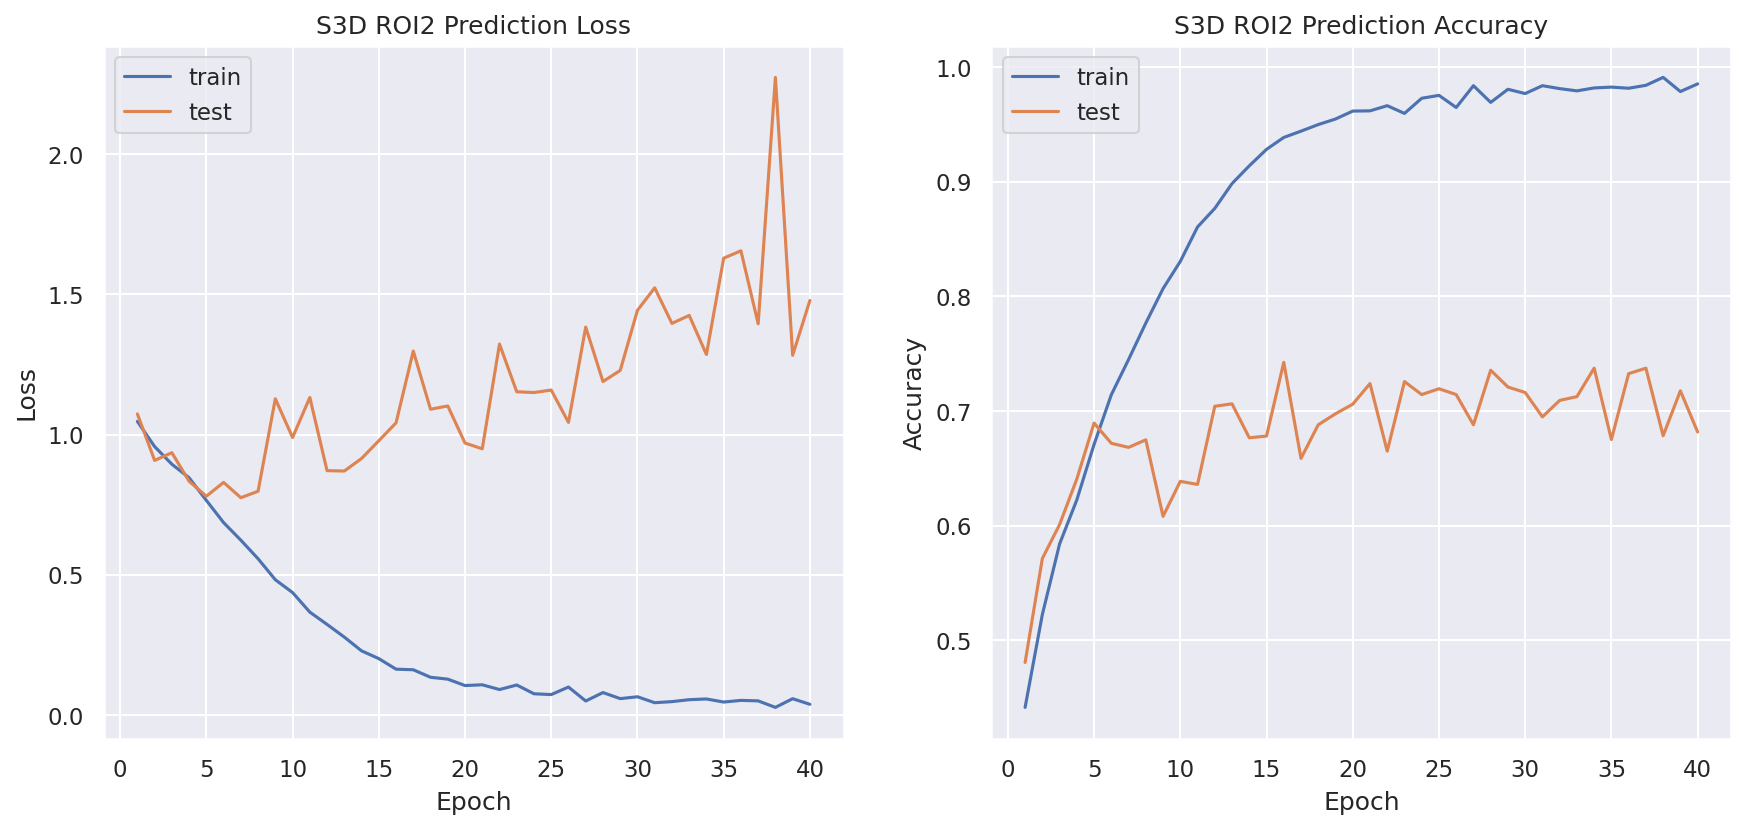

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'S3D ROI2 Prediction')

**Metrics:**

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = S3D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.745819397993311
Precision: 0.7474965453858649
Recall: 0.7465772273821809


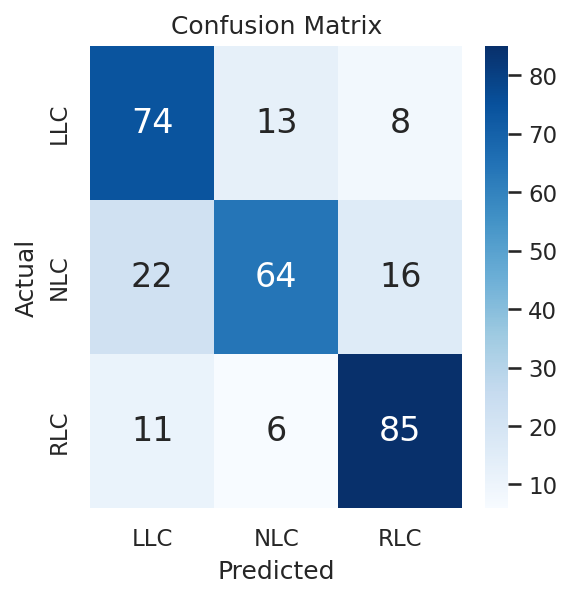

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

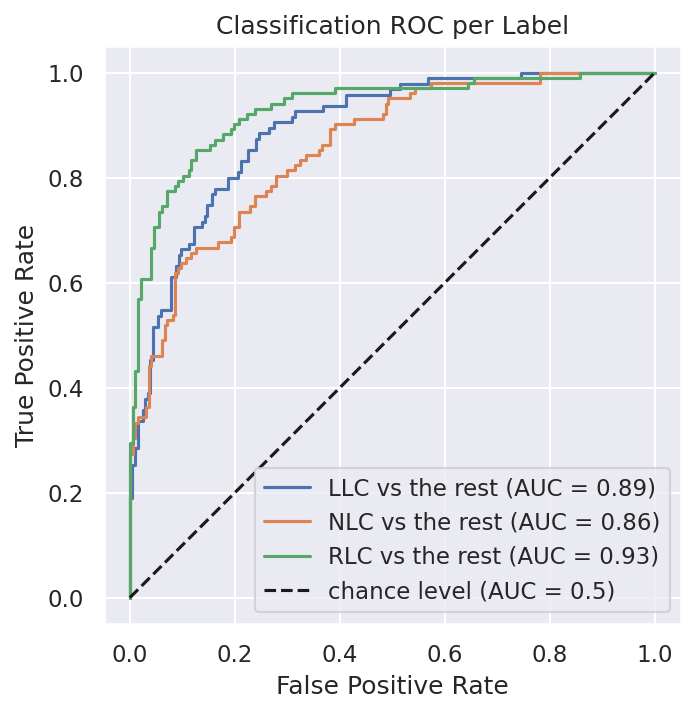

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)


fig, ax = plt.subplots(figsize=(5, 5))
label_set = ['LLC', 'NLC', 'RLC']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        predictions_prob[:, class_id],
        name=f"{label_set[class_id]} vs the rest",
        ax=ax
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification ROC per Label")
plt.legend()
plt.show()

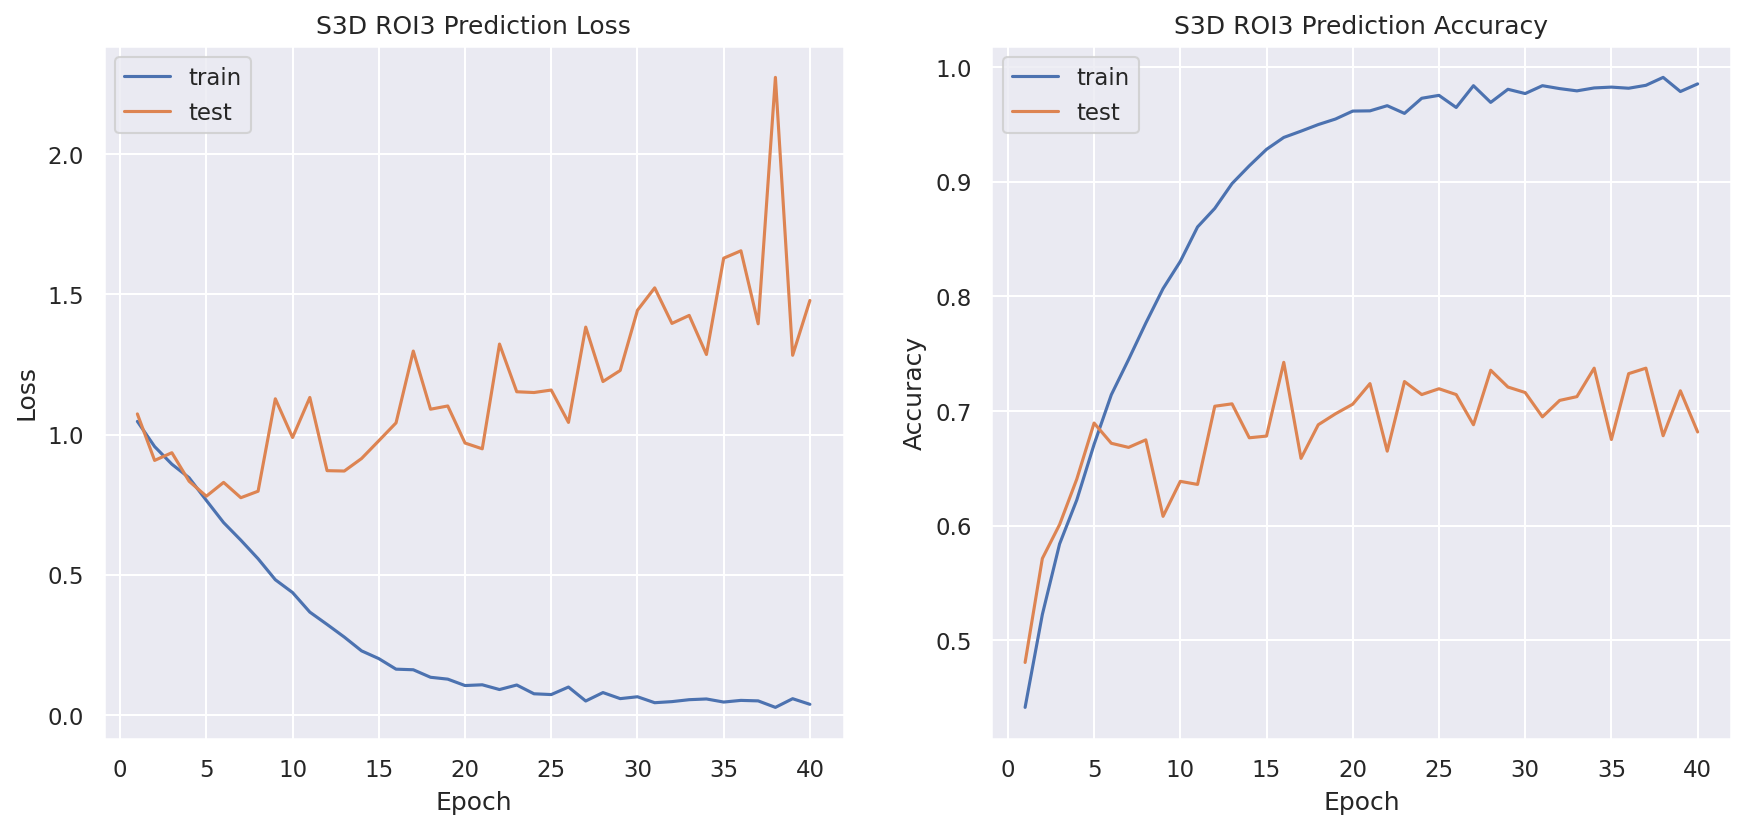

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'S3D ROI3 Prediction')

In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 8
result_path = str(base/'S3D_ROI3_prediction')
test_dir = './datasets/test/Prediction/ROI 3'
test_data = VideoFolderCustom(targ_dir=test_dir, permute=True)

# Create DataLoader's
test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

checkpoint = torch.load(result_path+'/best_model.pth')
model = S3D(num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test, predictions_prob = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.7090301003344481
Precision: 0.7250976976842858
Recall: 0.7111111111111112
